`To predict the price of the car based on multiple factors`

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Car_ID				Unique id of each observation (Integer)		
Symboling 				Its assigned insurance risk rating, A value of +3 indicates that the auto is risky, -3 that it is probably pretty safe.(Categorical) 		
carCompany				Name of car company (Categorical)		
fueltype				Car fuel type i.e gas or diesel (Categorical)		
aspiration				Aspiration used in a car (Categorical)		
doornumber				Number of doors in a car (Categorical)		
carbody				body of car (Categorical)		
drivewheel				type of drive wheel (Categorical)		
enginelocation				Location of car engine (Categorical)		
wheelbase				Weelbase of car (Numeric)		
carlength				Length of car (Numeric)		
carwidth				Width of car (Numeric)		
carheight				height of car (Numeric)		
curbweight				The weight of a car without occupants or baggage. (Numeric)		
enginetype				Type of engine. (Categorical)		
cylindernumber				cylinder placed in the car (Categorical)		
enginesize				Size of car (Numeric)		
fuelsystem				Fuel system of car (Categorical)		
boreratio				Boreratio of car (Numeric)		
stroke				Stroke or volume inside the engine (Numeric)		
compressionratio				compression ratio of car (Numeric)		
horsepower				Horsepower (Numeric)		
peakrpm				car peak rpm (Numeric)		
citympg				Mileage in city (Numeric)		
highwaympg				Mileage on highway (Numeric)		
price(Dependent variable)				Price of car (Numeric)		

In [2]:
import pandas as pd

In [3]:
data=pd.DataFrame(pd.read_csv("/content/drive/MyDrive/multiple linear regression/CarPrice_Assignment.csv"))

In [4]:
data

car_ID  symboling                   CarName fueltype aspiration  \
0         1          3        alfa-romero giulia      gas        std   
1         2          3       alfa-romero stelvio      gas        std   
2         3          1  alfa-romero Quadrifoglio      gas        std   
3         4          2               audi 100 ls      gas        std   
4         5          2                audi 100ls      gas        std   
..      ...        ...                       ...      ...        ...   
200     201         -1           volvo 145e (sw)      gas        std   
201     202         -1               volvo 144ea      gas      turbo   
202     203         -1               volvo 244dl      gas        std   
203     204         -1                 volvo 246   diesel      turbo   
204     205         -1               volvo 264gl      gas      turbo   

    doornumber      carbody drivewheel enginelocation  wheelbase  ...  \
0          two  convertible        rwd          front       88.6  ...   
1          two  convertible        rwd          front       88.6  ...   
2          two    hatchback        rwd          front       94.5  ...   
3         four        sedan        fwd          front       99.8  ...   
4         four        sedan        4wd          front       99.4  ...   
..         ...          ...        ...            ...        ...  ...   
200       four        sedan        rwd          front      109.1  ...   
201       four        sedan        rwd          front      109.1  ...   
202       four        sedan        rwd          front      109.1  ...   
203       four        sedan        rwd          front      109.1  ...   
204       four        sedan        rwd          front      109.1  ...   

     enginesize  fuelsystem  boreratio  stroke compressionratio horsepower  \
0           130        mpfi       3.47    2.68              9.0        111   
1           130        mpfi       3.47    2.68              9.0        111   
2           152        mpfi       2.68    3.47              9.0        154   
3           109        mpfi       3.19    3.40             10.0        102   
4           136        mpfi       3.19    3.40              8.0        115   
..          ...         ...        ...     ...              ...        ...   
200         141        mpfi       3.78    3.15              9.5        114   
201         141        mpfi       3.78    3.15              8.7        160   
202         173        mpfi       3.58    2.87              8.8        134   
203         145         idi       3.01    3.40             23.0        106   
204         141        mpfi       3.78    3.15              9.5        114   

     peakrpm citympg  highwaympg    price  
0       5000      21          27  13495.0  
1       5000      21          27  16500.0  
2       5000      19          26  16500.0  
3       5500      24          30  13950.0  
4       5500      18          22  17450.0  
..       ...     ...         ...      ...  
200     5400      23          28  16845.0  
201     5300      19          25  19045.0  
202     5500      18          23  21485.0  
203     4800      26          27  22470.0  
204     5400      19          25  22625.0  

[205 rows x 26 columns]

In [5]:
data.dtypes.to_frame()

0
car_ID              int64
symboling           int64
CarName            object
fueltype           object
aspiration         object
doornumber         object
carbody            object
drivewheel         object
enginelocation     object
wheelbase         float64
carlength         float64
carwidth          float64
carheight         float64
curbweight          int64
enginetype         object
cylindernumber     object
enginesize          int64
fuelsystem         object
boreratio         float64
stroke            float64
compressionratio  float64
horsepower          int64
peakrpm             int64
citympg             int64
highwaympg          int64
price             float64

In [6]:
df=pd.DataFrame()
df2=pd.DataFrame()

In [7]:
for i in data:
  if data[i].dtype=="object":
    df=pd.concat([df,data[i]],axis=1)
  else:
    df2=pd.concat([df2,data[i]],axis=1)

In [8]:
df

CarName fueltype aspiration doornumber      carbody  \
0          alfa-romero giulia      gas        std        two  convertible   
1         alfa-romero stelvio      gas        std        two  convertible   
2    alfa-romero Quadrifoglio      gas        std        two    hatchback   
3                 audi 100 ls      gas        std       four        sedan   
4                  audi 100ls      gas        std       four        sedan   
..                        ...      ...        ...        ...          ...   
200           volvo 145e (sw)      gas        std       four        sedan   
201               volvo 144ea      gas      turbo       four        sedan   
202               volvo 244dl      gas        std       four        sedan   
203                 volvo 246   diesel      turbo       four        sedan   
204               volvo 264gl      gas      turbo       four        sedan   

    drivewheel enginelocation enginetype cylindernumber fuelsystem  
0          rwd          front       dohc           four       mpfi  
1          rwd          front       dohc           four       mpfi  
2          rwd          front       ohcv            six       mpfi  
3          fwd          front        ohc           four       mpfi  
4          4wd          front        ohc           five       mpfi  
..         ...            ...        ...            ...        ...  
200        rwd          front        ohc           four       mpfi  
201        rwd          front        ohc           four       mpfi  
202        rwd          front       ohcv            six       mpfi  
203        rwd          front        ohc            six        idi  
204        rwd          front        ohc           four       mpfi  

[205 rows x 10 columns]

In [9]:
df2

car_ID  symboling  wheelbase  carlength  carwidth  carheight  curbweight  \
0         1          3       88.6      168.8      64.1       48.8        2548   
1         2          3       88.6      168.8      64.1       48.8        2548   
2         3          1       94.5      171.2      65.5       52.4        2823   
3         4          2       99.8      176.6      66.2       54.3        2337   
4         5          2       99.4      176.6      66.4       54.3        2824   
..      ...        ...        ...        ...       ...        ...         ...   
200     201         -1      109.1      188.8      68.9       55.5        2952   
201     202         -1      109.1      188.8      68.8       55.5        3049   
202     203         -1      109.1      188.8      68.9       55.5        3012   
203     204         -1      109.1      188.8      68.9       55.5        3217   
204     205         -1      109.1      188.8      68.9       55.5        3062   

     enginesize  boreratio  stroke  compressionratio  horsepower  peakrpm  \
0           130       3.47    2.68               9.0         111     5000   
1           130       3.47    2.68               9.0         111     5000   
2           152       2.68    3.47               9.0         154     5000   
3           109       3.19    3.40              10.0         102     5500   
4           136       3.19    3.40               8.0         115     5500   
..          ...        ...     ...               ...         ...      ...   
200         141       3.78    3.15               9.5         114     5400   
201         141       3.78    3.15               8.7         160     5300   
202         173       3.58    2.87               8.8         134     5500   
203         145       3.01    3.40              23.0         106     4800   
204         141       3.78    3.15               9.5         114     5400   

     citympg  highwaympg    price  
0         21          27  13495.0  
1         21          27  16500.0  
2         19          26  16500.0  
3         24          30  13950.0  
4         18          22  17450.0  
..       ...         ...      ...  
200       23          28  16845.0  
201       19          25  19045.0  
202       18          23  21485.0  
203       26          27  22470.0  
204       19          25  22625.0  

[205 rows x 16 columns]

In [10]:
data.head()

car_ID  symboling                   CarName fueltype aspiration doornumber  \
0       1          3        alfa-romero giulia      gas        std        two   
1       2          3       alfa-romero stelvio      gas        std        two   
2       3          1  alfa-romero Quadrifoglio      gas        std        two   
3       4          2               audi 100 ls      gas        std       four   
4       5          2                audi 100ls      gas        std       four   

       carbody drivewheel enginelocation  wheelbase  ...  enginesize  \
0  convertible        rwd          front       88.6  ...         130   
1  convertible        rwd          front       88.6  ...         130   
2    hatchback        rwd          front       94.5  ...         152   
3        sedan        fwd          front       99.8  ...         109   
4        sedan        4wd          front       99.4  ...         136   

   fuelsystem  boreratio  stroke compressionratio horsepower  peakrpm citympg  \
0        mpfi       3.47    2.68              9.0        111     5000      21   
1        mpfi       3.47    2.68              9.0        111     5000      21   
2        mpfi       2.68    3.47              9.0        154     5000      19   
3        mpfi       3.19    3.40             10.0        102     5500      24   
4        mpfi       3.19    3.40              8.0        115     5500      18   

   highwaympg    price  
0          27  13495.0  
1          27  16500.0  
2          26  16500.0  
3          30  13950.0  
4          22  17450.0  

[5 rows x 26 columns]

In [11]:
data.tail()

car_ID  symboling          CarName fueltype aspiration doornumber  \
200     201         -1  volvo 145e (sw)      gas        std       four   
201     202         -1      volvo 144ea      gas      turbo       four   
202     203         -1      volvo 244dl      gas        std       four   
203     204         -1        volvo 246   diesel      turbo       four   
204     205         -1      volvo 264gl      gas      turbo       four   

    carbody drivewheel enginelocation  wheelbase  ...  enginesize  fuelsystem  \
200   sedan        rwd          front      109.1  ...         141        mpfi   
201   sedan        rwd          front      109.1  ...         141        mpfi   
202   sedan        rwd          front      109.1  ...         173        mpfi   
203   sedan        rwd          front      109.1  ...         145         idi   
204   sedan        rwd          front      109.1  ...         141        mpfi   

     boreratio  stroke compressionratio horsepower  peakrpm citympg  \
200       3.78    3.15              9.5        114     5400      23   
201       3.78    3.15              8.7        160     5300      19   
202       3.58    2.87              8.8        134     5500      18   
203       3.01    3.40             23.0        106     4800      26   
204       3.78    3.15              9.5        114     5400      19   

     highwaympg    price  
200          28  16845.0  
201          25  19045.0  
202          23  21485.0  
203          27  22470.0  
204          25  22625.0  

[5 rows x 26 columns]

In [12]:
print("data shape",data.shape)

data shape (205, 26)


In [13]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

no values are missing

In [14]:
data.isnull().sum().to_frame().rename(columns={0:"missing values"})

missing values
car_ID                         0
symboling                      0
CarName                        0
fueltype                       0
aspiration                     0
doornumber                     0
carbody                        0
drivewheel                     0
enginelocation                 0
wheelbase                      0
carlength                      0
carwidth                       0
carheight                      0
curbweight                     0
enginetype                     0
cylindernumber                 0
enginesize                     0
fuelsystem                     0
boreratio                      0
stroke                         0
compressionratio               0
horsepower                     0
peakrpm                        0
citympg                        0
highwaympg                     0
price                          0

duplicated values will affect the model
so check for duplicate values if any remove

In [15]:
data.duplicated().sum()

0

In [16]:
pd.set_option("display.max_Rows",147)

EDA involves various steps, which may include:

Data Cleaning: Identifying and handling missing values, outliers, and inconsistencies in the data.

Descriptive Statistics: Computing summary statistics such as mean, median, mode, standard deviation, and percentiles to understand the central tendency, spread, and distribution of the data.

Data Visualization: Creating visual representations such as histograms, box plots, scatter plots, and heatmaps to visually explore the data, identify patterns, trends, and relationships between variables.

Feature Engineering: Creating new features or transforming existing features to extract more meaningful information from the data.

Correlation Analysis: Examining the relationships between variables using correlation coefficients or other statistical measures.

Dimensionality Reduction: Applying techniques like Principal Component Analysis (PCA) or t-SNE to reduce the dimensionality of the data while retaining important information.

Hypothesis Testing: Formulating and testing statistical hypotheses to make inferences about the data and validate assumptions.

Data cleaning: car name is not important from that  we can derive the company name

In [17]:
data["CarName"].value_counts().to_frame()

CarName
toyota corona                          6
toyota corolla                         6
peugeot 504                            6
subaru dl                              4
mitsubishi mirage g4                   3
mazda 626                              3
toyota mark ii                         3
mitsubishi outlander                   3
mitsubishi g4                          3
honda civic                            3
volvo 264gl                            2
bmw 320i                               2
isuzu D-Max                            2
audi 100ls                             2
volvo 244dl                            2
porsche cayenne                        2
toyota corolla liftback                2
honda accord                           2
bmw x3                                 2
volvo 144ea                            2
volvo 145e (sw)                        2
honda civic cvcc                       2
saab 99le                              2
toyota starlet                         2
saab 99gle                             2
toyota corolla 1200                    2
mazda rx-4                             2
mazda glc deluxe                       2
nissan rogue                           2
nissan latio                           2
mazda glc                              2
mazda rx-7 gs                          2
plymouth fury iii                      2
volkswagen dasher                      2
subaru                                 2
nissan clipper                         2
peugeot 604sl                          2
saab 99e                               2
peugeot 304                            1
peugeot 504 (sw)                       1
renault 5 gtl                          1
renault 12tl                           1
porsche boxter                         1
subaru brz                             1
porsche macan                          1
plymouth duster                        1
plymouth valiant                       1
plymouth fury gran sedan               1
plymouth satellite custom (sw)         1
plymouth cricket                       1
peugeot 505s turbo diesel              1
porcshce panamera                      1
toyota corona mark ii                  1
subaru baja                            1
toyota celica gt                       1
volvo 245                              1
volkswagen rabbit custom               1
volkswagen rabbit                      1
vw rabbit                              1
vw dasher                              1
volkswagen super beetle                1
volkswagen 411 (sw)                    1
volkswagen type 3                      1
volkswagen model 111                   1
volkswagen 1131 deluxe sedan           1
vokswagen rabbit                       1
toyouta tercel                         1
toyota cressida                        1
subaru r1                              1
toyota tercel                          1
toyota corona liftback                 1
toyota corolla tercel                  1
toyota celica gt liftback              1
volvo diesel                           1
toyota carina                          1
toyota corolla 1600 (sw)               1
toyota corona hardtop                  1
nissan kicks                           1
subaru tribeca                         1
subaru trezia                          1
subaru r2                              1
alfa-romero giulia                     1
nissan titan                           1
nissan teana                           1
nissan otti                            1
isuzu MU-X                             1
honda civic (auto)                     1
honda prelude                          1
honda civic 1300                       1
honda civic 1500 gl                    1
honda accord lx                        1
honda accord cvcc                      1
dodge coronet custom (sw)              1
dodge dart custom                      1
dodge coronet custom                   1
dodge colt (sw)                        1
dodge colt hardtop                     1
dodge monaco (s

In [18]:
df3=data["CarName"]

In [19]:
df3

0            alfa-romero giulia
1           alfa-romero stelvio
2      alfa-romero Quadrifoglio
3                   audi 100 ls
4                    audi 100ls
                 ...           
200             volvo 145e (sw)
201                 volvo 144ea
202                 volvo 244dl
203                   volvo 246
204                 volvo 264gl
Name: CarName, Length: 205, dtype: object

In [20]:
l=[]
for i in df3:
  i1=(i.split(" "))
  l.append(i1[0])

In [21]:
l

['alfa-romero',
 'alfa-romero',
 'alfa-romero',
 'audi',
 'audi',
 'audi',
 'audi',
 'audi',
 'audi',
 'audi',
 'bmw',
 'bmw',
 'bmw',
 'bmw',
 'bmw',
 'bmw',
 'bmw',
 'bmw',
 'chevrolet',
 'chevrolet',
 'chevrolet',
 'dodge',
 'dodge',
 'dodge',
 'dodge',
 'dodge',
 'dodge',
 'dodge',
 'dodge',
 'dodge',
 'honda',
 'honda',
 'honda',
 'honda',
 'honda',
 'honda',
 'honda',
 'honda',
 'honda',
 'honda',
 'honda',
 'honda',
 'honda',
 'isuzu',
 'isuzu',
 'isuzu',
 'isuzu',
 'jaguar',
 'jaguar',
 'jaguar',
 'maxda',
 'maxda',
 'mazda',
 'mazda',
 'mazda',
 'mazda',
 'mazda',
 'mazda',
 'mazda',
 'mazda',
 'mazda',
 'mazda',
 'mazda',
 'mazda',
 'mazda',
 'mazda',
 'mazda',
 'buick',
 'buick',
 'buick',
 'buick',
 'buick',
 'buick',
 'buick',
 'buick',
 'mercury',
 'mitsubishi',
 'mitsubishi',
 'mitsubishi',
 'mitsubishi',
 'mitsubishi',
 'mitsubishi',
 'mitsubishi',
 'mitsubishi',
 'mitsubishi',
 'mitsubishi',
 'mitsubishi',
 'mitsubishi',
 'mitsubishi',
 'Nissan',
 'nissan',
 'nissan',


In [22]:
company_name=pd.DataFrame(l)

In [23]:
company_name

0
0    alfa-romero
1    alfa-romero
2    alfa-romero
3           audi
4           audi
..           ...
200        volvo
201        volvo
202        volvo
203        volvo
204        volvo

[205 rows x 1 columns]

In [24]:
data=pd.concat([data,company_name],axis=1)

In [25]:
data.drop("CarName",axis=1,inplace=True)

In [26]:
data

car_ID  symboling fueltype aspiration doornumber      carbody drivewheel  \
0         1          3      gas        std        two  convertible        rwd   
1         2          3      gas        std        two  convertible        rwd   
2         3          1      gas        std        two    hatchback        rwd   
3         4          2      gas        std       four        sedan        fwd   
4         5          2      gas        std       four        sedan        4wd   
..      ...        ...      ...        ...        ...          ...        ...   
200     201         -1      gas        std       four        sedan        rwd   
201     202         -1      gas      turbo       four        sedan        rwd   
202     203         -1      gas        std       four        sedan        rwd   
203     204         -1   diesel      turbo       four        sedan        rwd   
204     205         -1      gas      turbo       four        sedan        rwd   

    enginelocation  wheelbase  carlength  ...  fuelsystem  boreratio  stroke  \
0            front       88.6      168.8  ...        mpfi       3.47    2.68   
1            front       88.6      168.8  ...        mpfi       3.47    2.68   
2            front       94.5      171.2  ...        mpfi       2.68    3.47   
3            front       99.8      176.6  ...        mpfi       3.19    3.40   
4            front       99.4      176.6  ...        mpfi       3.19    3.40   
..             ...        ...        ...  ...         ...        ...     ...   
200          front      109.1      188.8  ...        mpfi       3.78    3.15   
201          front      109.1      188.8  ...        mpfi       3.78    3.15   
202          front      109.1      188.8  ...        mpfi       3.58    2.87   
203          front      109.1      188.8  ...         idi       3.01    3.40   
204          front      109.1      188.8  ...        mpfi       3.78    3.15   

    compressionratio horsepower  peakrpm citympg  highwaympg    price  \
0                9.0        111     5000      21          27  13495.0   
1                9.0        111     5000      21          27  16500.0   
2                9.0        154     5000      19          26  16500.0   
3               10.0        102     5500      24          30  13950.0   
4                8.0        115     5500      18          22  17450.0   
..               ...        ...      ...     ...         ...      ...   
200              9.5        114     5400      23          28  16845.0   
201              8.7        160     5300      19          25  19045.0   
202              8.8        134     5500      18          23  21485.0   
203             23.0        106     4800      26          27  22470.0   
204              9.5        114     5400      19          25  22625.0   

               0  
0    alfa-romero  
1    alfa-romero  
2    alfa-romero  
3           audi  
4           audi  
..           ...  
200        volvo  
201        volvo  
202        volvo  
203        volvo  
204        volvo  

[205 rows x 26 columns]

In [27]:
data = data.rename(columns={0:"company_name"})

In [28]:
data

car_ID  symboling fueltype aspiration doornumber      carbody drivewheel  \
0         1          3      gas        std        two  convertible        rwd   
1         2          3      gas        std        two  convertible        rwd   
2         3          1      gas        std        two    hatchback        rwd   
3         4          2      gas        std       four        sedan        fwd   
4         5          2      gas        std       four        sedan        4wd   
..      ...        ...      ...        ...        ...          ...        ...   
200     201         -1      gas        std       four        sedan        rwd   
201     202         -1      gas      turbo       four        sedan        rwd   
202     203         -1      gas        std       four        sedan        rwd   
203     204         -1   diesel      turbo       four        sedan        rwd   
204     205         -1      gas      turbo       four        sedan        rwd   

    enginelocation  wheelbase  carlength  ...  fuelsystem  boreratio  stroke  \
0            front       88.6      168.8  ...        mpfi       3.47    2.68   
1            front       88.6      168.8  ...        mpfi       3.47    2.68   
2            front       94.5      171.2  ...        mpfi       2.68    3.47   
3            front       99.8      176.6  ...        mpfi       3.19    3.40   
4            front       99.4      176.6  ...        mpfi       3.19    3.40   
..             ...        ...        ...  ...         ...        ...     ...   
200          front      109.1      188.8  ...        mpfi       3.78    3.15   
201          front      109.1      188.8  ...        mpfi       3.78    3.15   
202          front      109.1      188.8  ...        mpfi       3.58    2.87   
203          front      109.1      188.8  ...         idi       3.01    3.40   
204          front      109.1      188.8  ...        mpfi       3.78    3.15   

    compressionratio horsepower  peakrpm citympg  highwaympg    price  \
0                9.0        111     5000      21          27  13495.0   
1                9.0        111     5000      21          27  16500.0   
2                9.0        154     5000      19          26  16500.0   
3               10.0        102     5500      24          30  13950.0   
4                8.0        115     5500      18          22  17450.0   
..               ...        ...      ...     ...         ...      ...   
200              9.5        114     5400      23          28  16845.0   
201              8.7        160     5300      19          25  19045.0   
202              8.8        134     5500      18          23  21485.0   
203             23.0        106     4800      26          27  22470.0   
204              9.5        114     5400      19          25  22625.0   

     company_name  
0     alfa-romero  
1     alfa-romero  
2     alfa-romero  
3            audi  
4            audi  
..            ...  
200         volvo  
201         volvo  
202         volvo  
203         volvo  
204         volvo  

[205 rows x 26 columns]

In [29]:
data=data.sort_index(axis=1)

In [30]:
data

aspiration  boreratio  car_ID      carbody  carheight  carlength  \
0          std       3.47       1  convertible       48.8      168.8   
1          std       3.47       2  convertible       48.8      168.8   
2          std       2.68       3    hatchback       52.4      171.2   
3          std       3.19       4        sedan       54.3      176.6   
4          std       3.19       5        sedan       54.3      176.6   
..         ...        ...     ...          ...        ...        ...   
200        std       3.78     201        sedan       55.5      188.8   
201      turbo       3.78     202        sedan       55.5      188.8   
202        std       3.58     203        sedan       55.5      188.8   
203      turbo       3.01     204        sedan       55.5      188.8   
204      turbo       3.78     205        sedan       55.5      188.8   

     carwidth  citympg company_name  compressionratio  ...  enginetype  \
0        64.1       21  alfa-romero               9.0  ...        dohc   
1        64.1       21  alfa-romero               9.0  ...        dohc   
2        65.5       19  alfa-romero               9.0  ...        ohcv   
3        66.2       24         audi              10.0  ...         ohc   
4        66.4       18         audi               8.0  ...         ohc   
..        ...      ...          ...               ...  ...         ...   
200      68.9       23        volvo               9.5  ...         ohc   
201      68.8       19        volvo               8.7  ...         ohc   
202      68.9       18        volvo               8.8  ...        ohcv   
203      68.9       26        volvo              23.0  ...         ohc   
204      68.9       19        volvo               9.5  ...         ohc   

    fuelsystem fueltype highwaympg horsepower  peakrpm    price stroke  \
0         mpfi      gas         27        111     5000  13495.0   2.68   
1         mpfi      gas         27        111     5000  16500.0   2.68   
2         mpfi      gas         26        154     5000  16500.0   3.47   
3         mpfi      gas         30        102     5500  13950.0   3.40   
4         mpfi      gas         22        115     5500  17450.0   3.40   
..         ...      ...        ...        ...      ...      ...    ...   
200       mpfi      gas         28        114     5400  16845.0   3.15   
201       mpfi      gas         25        160     5300  19045.0   3.15   
202       mpfi      gas         23        134     5500  21485.0   2.87   
203        idi   diesel         27        106     4800  22470.0   3.40   
204       mpfi      gas         25        114     5400  22625.0   3.15   

    symboling  wheelbase  
0           3       88.6  
1           3       88.6  
2           1       94.5  
3           2       99.8  
4           2       99.4  
..        ...        ...  
200        -1      109.1  
201        -1      109.1  
202        -1      109.1  
203        -1      109.1  
204        -1      109.1  

[205 rows x 26 columns]

In [31]:
data[["cylindernumber","price"]]

cylindernumber    price
0             four  13495.0
1             four  16500.0
2              six  16500.0
3             four  13950.0
4             five  17450.0
..             ...      ...
200           four  16845.0
201           four  19045.0
202            six  21485.0
203            six  22470.0
204           four  22625.0

[205 rows x 2 columns]

Mistakes in car name:
maxda = mazda
Nissan = nissan
porsche = porcshce
toyota = toyouta
vokswagen = volkswagen = vw

In [32]:
def replace(a,b):
  data["company_name"].replace(a,b,inplace=True)
replace('maxda','mazda')
replace('porcshce','porsche')
replace('toyouta','toyota')
replace('vokswagen','volkswagen')
replace('vw','volkswagen')
replace('Nissan','nissan')


In [33]:
pd.set_option("display.max_Rows",245)

In [34]:
data

aspiration  boreratio  car_ID      carbody  carheight  carlength  \
0          std       3.47       1  convertible       48.8      168.8   
1          std       3.47       2  convertible       48.8      168.8   
2          std       2.68       3    hatchback       52.4      171.2   
3          std       3.19       4        sedan       54.3      176.6   
4          std       3.19       5        sedan       54.3      176.6   
5          std       3.19       6        sedan       53.1      177.3   
6          std       3.19       7        sedan       55.7      192.7   
7          std       3.19       8        wagon       55.7      192.7   
8        turbo       3.13       9        sedan       55.9      192.7   
9        turbo       3.13      10    hatchback       52.0      178.2   
10         std       3.50      11        sedan       54.3      176.8   
11         std       3.50      12        sedan       54.3      176.8   
12         std       3.31      13        sedan       54.3      176.8   
13         std       3.31      14        sedan       54.3      176.8   
14         std       3.31      15        sedan       55.7      189.0   
15         std       3.62      16        sedan       55.7      189.0   
16         std       3.62      17        sedan       53.7      193.8   
17         std       3.62      18        sedan       56.3      197.0   
18         std       2.91      19    hatchback       53.2      141.1   
19         std       3.03      20    hatchback       52.0      155.9   
20         std       3.03      21        sedan       52.0      158.8   
21         std       2.97      22    hatchback       50.8      157.3   
22         std       2.97      23    hatchback       50.8      157.3   
23       turbo       3.03      24    hatchback       50.8      157.3   
24         std       2.97      25    hatchback       50.6      157.3   
25         std       2.97      26        sedan       50.6      157.3   
26         std       2.97      27        sedan       50.6      157.3   
27       turbo       3.03      28        sedan       50.6      157.3   
28         std       3.34      29        wagon       59.8      174.6   
29       turbo       3.60      30    hatchback       50.2      173.2   
30         std       2.91      31    hatchback       50.8      144.6   
31         std       2.91      32    hatchback       50.8      144.6   
32         std       2.91      33    hatchback       52.6      150.0   
33         std       2.91      34    hatchback       52.6      150.0   
34         std       2.91      35    hatchback       52.6      150.0   
35         std       2.91      36        sedan       54.5      163.4   
36         std       2.92      37        wagon       58.3      157.1   
37         std       3.15      38    hatchback       53.3      167.5   
38         std       3.15      39    hatchback       53.3      167.5   
39         std       3.15      40        sedan       54.1      175.4   
40         std       3.15      41        sedan       54.1      175.4   
41         std       3.15      42        sedan       54.1      175.4   
42         std       3.15      43        sedan       51.0      169.1   
43         std       3.31      44        sedan       53.5      170.7   
44         std       3.03      45        sedan       52.0      155.9   
45         std       3.03      46        sedan       52.0      155.9   
46         std       3.43      47    hatchback       51.4      172.6   
47         std       3.63      48        sedan       52.8      199.6   
48         std       3.63      49        sedan       52.8      199.6   
49         std       3.54      50        sedan       47.8      191.7   
50         std       3.03      51    hatchback       54.1      159.1   
51         std       3.03      52    hatchback       54.1      159.1   
52         std       3.03      53    hatchback       54.1      159.1   
53         std       3.03      54        sedan       54.1      166.8   
54         std       3.08      55        sed

DESCRIPTIVE STATISTICS:

In [35]:
data["price"].max()

45400.0

In [36]:
data[data["price"]==data["price"].max()]

aspiration  boreratio  car_ID  carbody  carheight  carlength  carwidth  \
74        std        3.8      75  hardtop       55.4      199.2      72.0   

    citympg company_name  compressionratio  ...  enginetype fuelsystem  \
74       14        buick               8.0  ...        ohcv       mpfi   

   fueltype highwaympg horsepower  peakrpm    price stroke symboling  \
74      gas         16        184     4500  45400.0   3.35         1   

    wheelbase  
74      112.0  

[1 rows x 26 columns]

from the above cell we can interpret buick is the most expensive car that has been sold

In [37]:
data[data["price"]==data["price"].min()]

aspiration  boreratio  car_ID    carbody  carheight  carlength  carwidth  \
138        std       3.62     139  hatchback       53.7      156.9      63.4   

     citympg company_name  compressionratio  ...  enginetype fuelsystem  \
138       31       subaru               9.0  ...        ohcf       2bbl   

    fueltype highwaympg horsepower  peakrpm   price stroke symboling  \
138      gas         36         69     4900  5118.0   2.36         2   

     wheelbase  
138       93.7  

[1 rows x 26 columns]

from the above cell we can conclude subaru seems to be the cheapest car 

In [38]:
data["company_name"].mode()

0    toyota
Name: company_name, dtype: object

In [39]:
data[data["company_name"]=="toyota"]["company_name"].count()

32

toyoto cars are sold the most compared to other cars

DATA VISUALIZATION:


In [40]:
import seaborn as sns
import matplotlib.pyplot as plt


<Axes: xlabel='company_name', ylabel='count'>

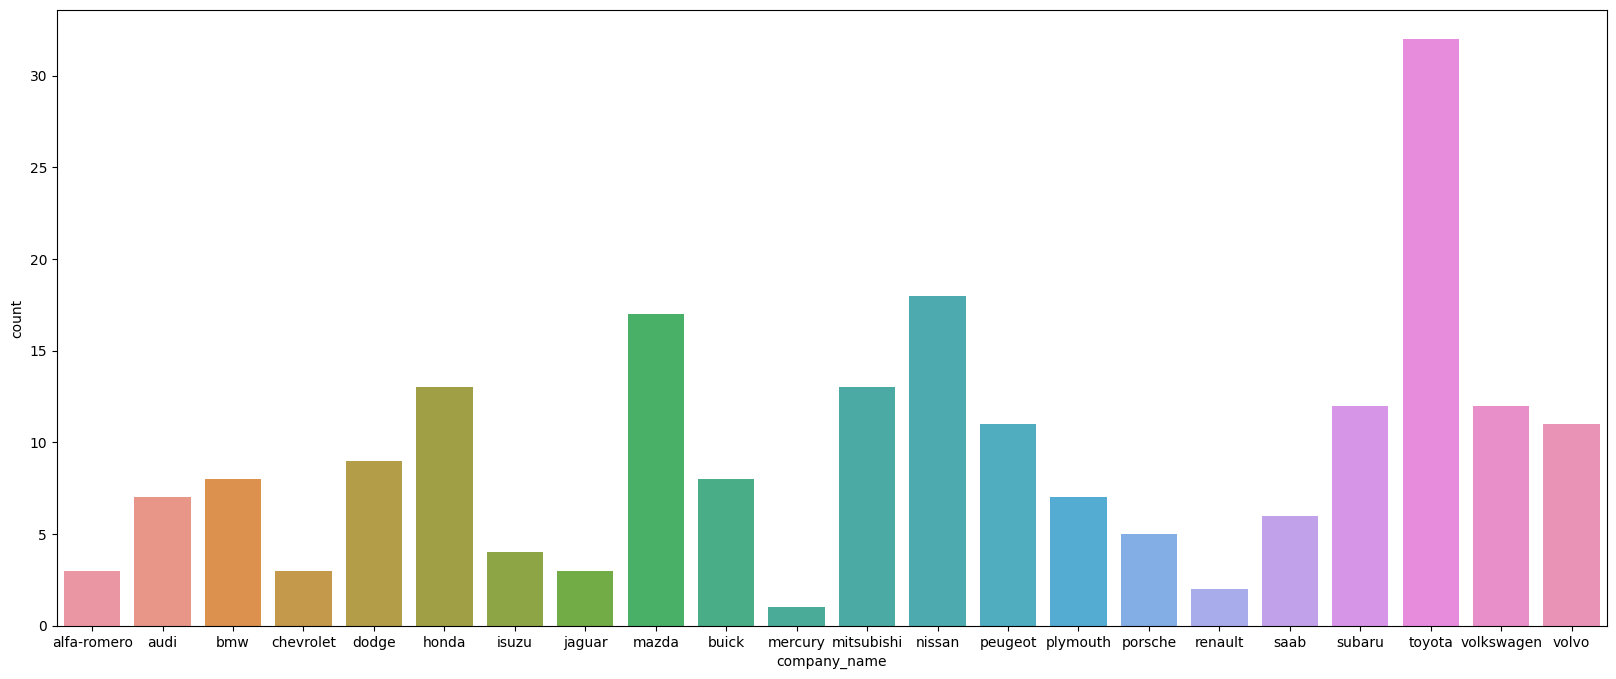

In [41]:
fig=plt.figure(figsize=(20,8))
sns.countplot(x=data["company_name"])


In [42]:
df=pd.DataFrame()
df2=pd.DataFrame()

In [43]:
for i in data:
  if data[i].dtype=="object":
    df=pd.concat([df,data[i]],axis=1)
  else:
    df2=pd.concat([df2,data[i]],axis=1)

In [44]:
df

aspiration      carbody company_name cylindernumber doornumber drivewheel  \
0          std  convertible  alfa-romero           four        two        rwd   
1          std  convertible  alfa-romero           four        two        rwd   
2          std    hatchback  alfa-romero            six        two        rwd   
3          std        sedan         audi           four       four        fwd   
4          std        sedan         audi           five       four        4wd   
5          std        sedan         audi           five        two        fwd   
6          std        sedan         audi           five       four        fwd   
7          std        wagon         audi           five       four        fwd   
8        turbo        sedan         audi           five       four        fwd   
9        turbo    hatchback         audi           five        two        4wd   
10         std        sedan          bmw           four        two        rwd   
11         std        sedan          bmw           four       four        rwd   
12         std        sedan          bmw            six        two        rwd   
13         std        sedan          bmw            six       four        rwd   
14         std        sedan          bmw            six       four        rwd   
15         std        sedan          bmw            six       four        rwd   
16         std        sedan          bmw            six        two        rwd   
17         std        sedan          bmw            six       four        rwd   
18         std    hatchback    chevrolet          three        two        fwd   
19         std    hatchback    chevrolet           four        two        fwd   
20         std        sedan    chevrolet           four       four        fwd   
21         std    hatchback        dodge           four        two        fwd   
22         std    hatchback        dodge           four        two        fwd   
23       turbo    hatchback        dodge           four        two        fwd   
24         std    hatchback        dodge           four       four        fwd   
25         std        sedan        dodge           four       four        fwd   
26         std        sedan        dodge           four       four        fwd   
27       turbo        sedan        dodge           four        two        fwd   
28         std        wagon        dodge           four       four        fwd   
29       turbo    hatchback        dodge           four        two        fwd   
30         std    hatchback        honda           four        two        fwd   
31         std    hatchback        honda           four        two        fwd   
32         std    hatchback        honda           four        two        fwd   
33         std    hatchback        honda           four        two        fwd   
34         std    hatchback        honda           four        two        fwd   
35         std        sedan        honda           four       four        fwd   
36         std        wagon        honda           four       four        fwd   
37         std    hatchback        honda           four        two        fwd   
38         std    hatchback        honda           four        two        fwd   
39         std        sedan        honda           four       four        fwd   
40         std        sedan        honda           four       four        fwd   
41         std        sedan        honda           four       four        fwd   
42         std        sedan        honda           four        two        fwd   
43         std        sedan        isuzu           four       four        rwd   
44         std        sedan        isuzu           four        two        fwd   
45         std        sedan        isuzu           four       four        fwd   
46         std    hatchback        isuzu           four        two        rwd   
47         std        sedan       jaguar            six       four        rwd   
48         std        sedan       j

In [45]:
df2

boreratio  car_ID  carheight  carlength  carwidth  citympg  \
0         3.47       1       48.8      168.8      64.1       21   
1         3.47       2       48.8      168.8      64.1       21   
2         2.68       3       52.4      171.2      65.5       19   
3         3.19       4       54.3      176.6      66.2       24   
4         3.19       5       54.3      176.6      66.4       18   
5         3.19       6       53.1      177.3      66.3       19   
6         3.19       7       55.7      192.7      71.4       19   
7         3.19       8       55.7      192.7      71.4       19   
8         3.13       9       55.9      192.7      71.4       17   
9         3.13      10       52.0      178.2      67.9       16   
10        3.50      11       54.3      176.8      64.8       23   
11        3.50      12       54.3      176.8      64.8       23   
12        3.31      13       54.3      176.8      64.8       21   
13        3.31      14       54.3      176.8      64.8       21   
14        3.31      15       55.7      189.0      66.9       20   
15        3.62      16       55.7      189.0      66.9       16   
16        3.62      17       53.7      193.8      67.9       16   
17        3.62      18       56.3      197.0      70.9       15   
18        2.91      19       53.2      141.1      60.3       47   
19        3.03      20       52.0      155.9      63.6       38   
20        3.03      21       52.0      158.8      63.6       38   
21        2.97      22       50.8      157.3      63.8       37   
22        2.97      23       50.8      157.3      63.8       31   
23        3.03      24       50.8      157.3      63.8       24   
24        2.97      25       50.6      157.3      63.8       31   
25        2.97      26       50.6      157.3      63.8       31   
26        2.97      27       50.6      157.3      63.8       31   
27        3.03      28       50.6      157.3      63.8       24   
28        3.34      29       59.8      174.6      64.6       24   
29        3.60      30       50.2      173.2      66.3       19   
30        2.91      31       50.8      144.6      63.9       49   
31        2.91      32       50.8      144.6      63.9       31   
32        2.91      33       52.6      150.0      64.0       38   
33        2.91      34       52.6      150.0      64.0       30   
34        2.91      35       52.6      150.0      64.0       30   
35        2.91      36       54.5      163.4      64.0       30   
36        2.92      37       58.3      157.1      63.9       30   
37        3.15      38       53.3      167.5      65.2       27   
38        3.15      39       53.3      167.5      65.2       27   
39        3.15      40       54.1      175.4      65.2       27   
40        3.15      41       54.1      175.4      62.5       27   
41        3.15      42       54.1      175.4      65.2       24   
42        3.15      43       51.0      169.1      66.0       25   
43        3.31      44       53.5      170.7      61.8       24   
44        3.03      45       52.0      155.9      63.6       38   
45        3.03      46       52.0      155.9      63.6       38   
46        3.43      47       51.4      172.6      65.2       24   
47        3.63      48       52.8      199.6      69.6       15   
48        3.63      49       52.8      199.6      69.6       15   
49        3.54      50       47.8      191.7      70.6       13   
50        3.03      51       54.1      159.1      64.2       30   
51        3.03      52       54.1      159.1      64.2       31   
52        3.03      53       54.1      159.1      64.2       31   
53        3.03      54       54.1      166.8      64.2       31   
54        3.08      55       54.1      166.8      64.2       31   
55        3.33      56       49.6      169.0      65.7       17   
56        3.33      57       49.6      169.0      65.7       17   
57        3.33      58       49.6      169.0      65.7       17   
58        3.33      59       49.6      169.0      65

SCATTER DIAGRAM

In [46]:
def scatter(col):
     x=1
     fig=plt.figure(figsize=(20,5))
     for i in col:
          plt.subplot(1,3,x)
          sns.scatterplot(x=i,y="price",data=data,color="red")
          x+=1

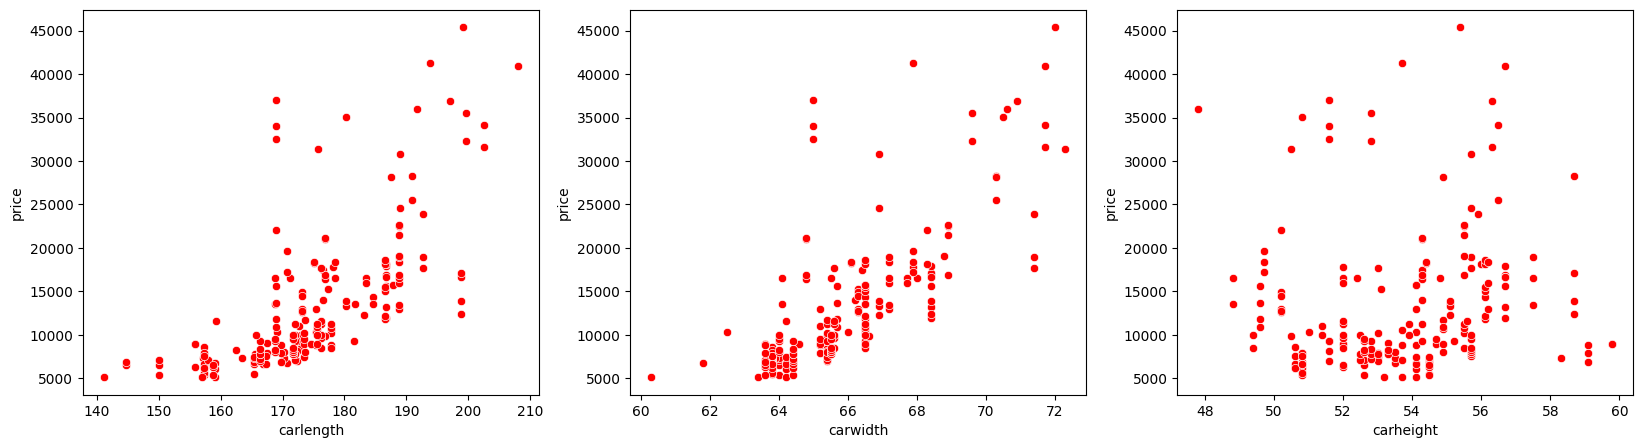

In [47]:
scatter(["carlength","carwidth","carheight"])

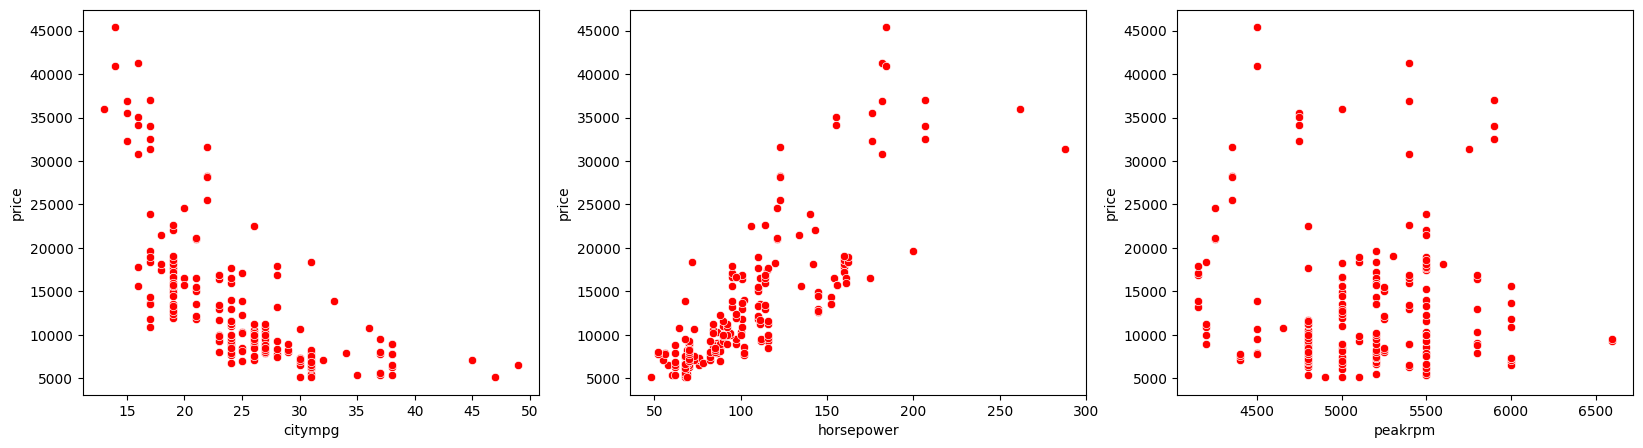

In [48]:
scatter(["citympg","horsepower","peakrpm"])


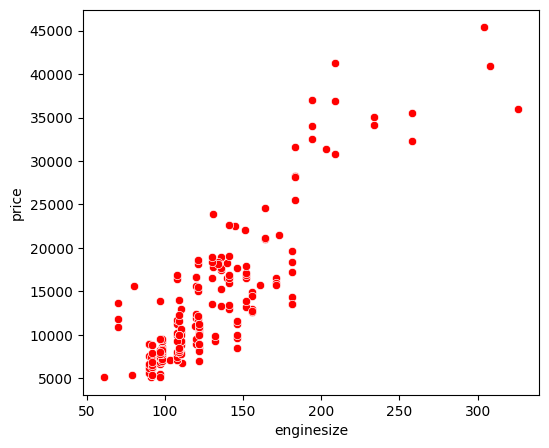

In [49]:
scatter(["enginesize"])

In [50]:
df

aspiration      carbody company_name cylindernumber doornumber drivewheel  \
0          std  convertible  alfa-romero           four        two        rwd   
1          std  convertible  alfa-romero           four        two        rwd   
2          std    hatchback  alfa-romero            six        two        rwd   
3          std        sedan         audi           four       four        fwd   
4          std        sedan         audi           five       four        4wd   
5          std        sedan         audi           five        two        fwd   
6          std        sedan         audi           five       four        fwd   
7          std        wagon         audi           five       four        fwd   
8        turbo        sedan         audi           five       four        fwd   
9        turbo    hatchback         audi           five        two        4wd   
10         std        sedan          bmw           four        two        rwd   
11         std        sedan          bmw           four       four        rwd   
12         std        sedan          bmw            six        two        rwd   
13         std        sedan          bmw            six       four        rwd   
14         std        sedan          bmw            six       four        rwd   
15         std        sedan          bmw            six       four        rwd   
16         std        sedan          bmw            six        two        rwd   
17         std        sedan          bmw            six       four        rwd   
18         std    hatchback    chevrolet          three        two        fwd   
19         std    hatchback    chevrolet           four        two        fwd   
20         std        sedan    chevrolet           four       four        fwd   
21         std    hatchback        dodge           four        two        fwd   
22         std    hatchback        dodge           four        two        fwd   
23       turbo    hatchback        dodge           four        two        fwd   
24         std    hatchback        dodge           four       four        fwd   
25         std        sedan        dodge           four       four        fwd   
26         std        sedan        dodge           four       four        fwd   
27       turbo        sedan        dodge           four        two        fwd   
28         std        wagon        dodge           four       four        fwd   
29       turbo    hatchback        dodge           four        two        fwd   
30         std    hatchback        honda           four        two        fwd   
31         std    hatchback        honda           four        two        fwd   
32         std    hatchback        honda           four        two        fwd   
33         std    hatchback        honda           four        two        fwd   
34         std    hatchback        honda           four        two        fwd   
35         std        sedan        honda           four       four        fwd   
36         std        wagon        honda           four       four        fwd   
37         std    hatchback        honda           four        two        fwd   
38         std    hatchback        honda           four        two        fwd   
39         std        sedan        honda           four       four        fwd   
40         std        sedan        honda           four       four        fwd   
41         std        sedan        honda           four       four        fwd   
42         std        sedan        honda           four        two        fwd   
43         std        sedan        isuzu           four       four        rwd   
44         std        sedan        isuzu           four        two        fwd   
45         std        sedan        isuzu           four       four        fwd   
46         std    hatchback        isuzu           four        two        rwd   
47         std        sedan       jaguar            six       four        rwd   
48         std        sedan       j

In [51]:
for i in df:
  print(i,len(df[i].unique()))

aspiration 2
carbody 5
company_name 22
cylindernumber 7
doornumber 2
drivewheel 3
enginelocation 2
enginetype 7
fuelsystem 8
fueltype 2


PREPROCESSING

From sklearn.preprocessing we can import label encoder that helps in encoding the categorical values.
This approach is useful only if there are two categories otherwise the model will wrongly understand and introduce bias


In [52]:
from sklearn.preprocessing import LabelEncoder

In [53]:
le=LabelEncoder()

In [54]:
df4=pd.DataFrame()
df5=pd.DataFrame()

In [55]:
for i in df:
  if(len(df[i].unique()))==2:
    df4=pd.concat([df4,df[i]],axis=1)
  else:
     df5=pd.concat([df5,df[i]],axis=1)

In [56]:
df4

aspiration doornumber enginelocation fueltype
0          std        two          front      gas
1          std        two          front      gas
2          std        two          front      gas
3          std       four          front      gas
4          std       four          front      gas
5          std        two          front      gas
6          std       four          front      gas
7          std       four          front      gas
8        turbo       four          front      gas
9        turbo        two          front      gas
10         std        two          front      gas
11         std       four          front      gas
12         std        two          front      gas
13         std       four          front      gas
14         std       four          front      gas
15         std       four          front      gas
16         std        two          front      gas
17         std       four          front      gas
18         std        two          front      gas
19         std        two          front      gas
20         std       four          front      gas
21         std        two          front      gas
22         std        two          front      gas
23       turbo        two          front      gas
24         std       four          front      gas
25         std       four          front      gas
26         std       four          front      gas
27       turbo        two          front      gas
28         std       four          front      gas
29       turbo        two          front      gas
30         std        two          front      gas
31         std        two          front      gas
32         std        two          front      gas
33         std        two          front      gas
34         std        two          front      gas
35         std       four          front      gas
36         std       four          front      gas
37         std        two          front      gas
38         std        two          front      gas
39         std       four          front      gas
40         std       four          front      gas
41         std       four          front      gas
42         std        two          front      gas
43         std       four          front      gas
44         std        two          front      gas
45         std       four          front      gas
46         std        two          front      gas
47         std       four          front      gas
48         std       four          front      gas
49         std        two          front      gas
50         std        two          front      gas
51         std        two          front      gas
52         std        two          front      gas
53         std       four          front      gas
54         std       four          front      gas
55         std        two          front      gas
56         std        two          front      gas
57         std        two          front      gas
58         std        two          front      gas
59         std        two          front      gas
60         std       four          front      gas
61         std        two          front      gas
62         std       four          front      gas
63         std       four          front   diesel
64         std       four          front      gas
65         std       four          front      gas
66         std       four          front   diesel
67       turbo       four          front   diesel
68       turbo       four          front   diesel
69       turbo        two          front   diesel
70       turbo       four          front   diesel
71         std       four          front      gas
72         std        two          front      gas
73         std       four          front      gas
74         std        two          front      gas
75       turbo        two          front      gas
76         std        two          front      gas
77         std        two          front      gas
78         std        two          front      gas
79  

In [57]:
for j in df4:
  df4[j]=le.fit_transform(df4[j])
 

In [58]:
df4

aspiration  doornumber  enginelocation  fueltype
0             0           1               0         1
1             0           1               0         1
2             0           1               0         1
3             0           0               0         1
4             0           0               0         1
5             0           1               0         1
6             0           0               0         1
7             0           0               0         1
8             1           0               0         1
9             1           1               0         1
10            0           1               0         1
11            0           0               0         1
12            0           1               0         1
13            0           0               0         1
14            0           0               0         1
15            0           0               0         1
16            0           1               0         1
17            0           0               0         1
18            0           1               0         1
19            0           1               0         1
20            0           0               0         1
21            0           1               0         1
22            0           1               0         1
23            1           1               0         1
24            0           0               0         1
25            0           0               0         1
26            0           0               0         1
27            1           1               0         1
28            0           0               0         1
29            1           1               0         1
30            0           1               0         1
31            0           1               0         1
32            0           1               0         1
33            0           1               0         1
34            0           1               0         1
35            0           0               0         1
36            0           0               0         1
37            0           1               0         1
38            0           1               0         1
39            0           0               0         1
40            0           0               0         1
41            0           0               0         1
42            0           1               0         1
43            0           0               0         1
44            0           1               0         1
45            0           0               0         1
46            0           1               0         1
47            0           0               0         1
48            0           0               0         1
49            0           1               0         1
50            0           1               0         1
51            0           1               0         1
52            0           1               0         1
53            0           0               0         1
54            0           0               0         1
55            0           1               0         1
56            0           1               0         1
57            0           1               0         1
58            0           1               0         1
59            0           1               0         1
60            0           0               0         1
61            0           1               0         1
62            0           0               0         1
63            0           0               0         0
64            0           0               0         1
65            0           0               0         1
66            0           0               0         0
67            1           0               0         0
68            1           0               0         0
69            1           1               0         0
70            1           0               0         0
71            0           0               0         1
72            0           1               0         1
73       

In [59]:
df5

carbody company_name cylindernumber drivewheel enginetype fuelsystem
0    convertible  alfa-romero           four        rwd       dohc       mpfi
1    convertible  alfa-romero           four        rwd       dohc       mpfi
2      hatchback  alfa-romero            six        rwd       ohcv       mpfi
3          sedan         audi           four        fwd        ohc       mpfi
4          sedan         audi           five        4wd        ohc       mpfi
5          sedan         audi           five        fwd        ohc       mpfi
6          sedan         audi           five        fwd        ohc       mpfi
7          wagon         audi           five        fwd        ohc       mpfi
8          sedan         audi           five        fwd        ohc       mpfi
9      hatchback         audi           five        4wd        ohc       mpfi
10         sedan          bmw           four        rwd        ohc       mpfi
11         sedan          bmw           four        rwd        ohc       mpfi
12         sedan          bmw            six        rwd        ohc       mpfi
13         sedan          bmw            six        rwd        ohc       mpfi
14         sedan          bmw            six        rwd        ohc       mpfi
15         sedan          bmw            six        rwd        ohc       mpfi
16         sedan          bmw            six        rwd        ohc       mpfi
17         sedan          bmw            six        rwd        ohc       mpfi
18     hatchback    chevrolet          three        fwd          l       2bbl
19     hatchback    chevrolet           four        fwd        ohc       2bbl
20         sedan    chevrolet           four        fwd        ohc       2bbl
21     hatchback        dodge           four        fwd        ohc       2bbl
22     hatchback        dodge           four        fwd        ohc       2bbl
23     hatchback        dodge           four        fwd        ohc       mpfi
24     hatchback        dodge           four        fwd        ohc       2bbl
25         sedan        dodge           four        fwd        ohc       2bbl
26         sedan        dodge           four        fwd        ohc       2bbl
27         sedan        dodge           four        fwd        ohc       mpfi
28         wagon        dodge           four        fwd        ohc       2bbl
29     hatchback        dodge           four        fwd        ohc        mfi
30     hatchback        honda           four        fwd        ohc       1bbl
31     hatchback        honda           four        fwd        ohc       1bbl
32     hatchback        honda           four        fwd        ohc       1bbl
33     hatchback        honda           four        fwd        ohc       1bbl
34     hatchback        honda           four        fwd        ohc       1bbl
35         sedan        honda           four        fwd        ohc       1bbl
36         wagon        honda           four        fwd        ohc       1bbl
37     hatchback        honda           four        fwd        ohc       1bbl
38     hatchback        honda           four        fwd        ohc       1bbl
39         sedan        honda           four        fwd        ohc       1bbl
40         sedan        honda           four        fwd        ohc       1bbl
41         sedan        honda           four        fwd        ohc       mpfi
42         sedan        honda           four        fwd        ohc       2bbl
43         sedan        isuzu           four        rwd        ohc       2bbl
44         sedan        isuzu           four        fwd        ohc       2bbl
45         sedan        isuzu           four        fwd        ohc       2bbl
46     hatchback        isuzu           four        rwd        ohc       spfi
47         sedan       jaguar            six        rwd       dohc       mpfi
48         sedan       jaguar            six        rwd       dohc       mpfi
49         sedan       jaguar         twelve        rwd       ohcv       mpfi
50     hatchback        mazda  

If there are more than two categorical values one hot encoding approach can be used 

In [60]:
from sklearn.preprocessing import OneHotEncoder

In [61]:
ohe=OneHotEncoder()

In [62]:
df6=pd.DataFrame(df5["company_name"])

In [63]:
df5.drop("company_name",axis=1,inplace=True)

In [64]:
df5

carbody cylindernumber drivewheel enginetype fuelsystem
0    convertible           four        rwd       dohc       mpfi
1    convertible           four        rwd       dohc       mpfi
2      hatchback            six        rwd       ohcv       mpfi
3          sedan           four        fwd        ohc       mpfi
4          sedan           five        4wd        ohc       mpfi
5          sedan           five        fwd        ohc       mpfi
6          sedan           five        fwd        ohc       mpfi
7          wagon           five        fwd        ohc       mpfi
8          sedan           five        fwd        ohc       mpfi
9      hatchback           five        4wd        ohc       mpfi
10         sedan           four        rwd        ohc       mpfi
11         sedan           four        rwd        ohc       mpfi
12         sedan            six        rwd        ohc       mpfi
13         sedan            six        rwd        ohc       mpfi
14         sedan            six        rwd        ohc       mpfi
15         sedan            six        rwd        ohc       mpfi
16         sedan            six        rwd        ohc       mpfi
17         sedan            six        rwd        ohc       mpfi
18     hatchback          three        fwd          l       2bbl
19     hatchback           four        fwd        ohc       2bbl
20         sedan           four        fwd        ohc       2bbl
21     hatchback           four        fwd        ohc       2bbl
22     hatchback           four        fwd        ohc       2bbl
23     hatchback           four        fwd        ohc       mpfi
24     hatchback           four        fwd        ohc       2bbl
25         sedan           four        fwd        ohc       2bbl
26         sedan           four        fwd        ohc       2bbl
27         sedan           four        fwd        ohc       mpfi
28         wagon           four        fwd        ohc       2bbl
29     hatchback           four        fwd        ohc        mfi
30     hatchback           four        fwd        ohc       1bbl
31     hatchback           four        fwd        ohc       1bbl
32     hatchback           four        fwd        ohc       1bbl
33     hatchback           four        fwd        ohc       1bbl
34     hatchback           four        fwd        ohc       1bbl
35         sedan           four        fwd        ohc       1bbl
36         wagon           four        fwd        ohc       1bbl
37     hatchback           four        fwd        ohc       1bbl
38     hatchback           four        fwd        ohc       1bbl
39         sedan           four        fwd        ohc       1bbl
40         sedan           four        fwd        ohc       1bbl
41         sedan           four        fwd        ohc       mpfi
42         sedan           four        fwd        ohc       2bbl
43         sedan           four        rwd        ohc       2bbl
44         sedan           four        fwd        ohc       2bbl
45         sedan           four        fwd        ohc       2bbl
46     hatchback           four        rwd        ohc       spfi
47         sedan            six        rwd       dohc       mpfi
48         sedan            six        rwd       dohc       mpfi
49         sedan         twelve        rwd       ohcv       mpfi
50     hatchback           four        fwd        ohc       2bbl
51     hatchback           four        fwd        ohc       2bbl
52     hatchback           four        fwd        ohc       2bbl
53         sedan           four        fwd        ohc       2bbl
54         sedan           four        fwd        ohc       2bbl
55     hatchback            two        rwd      rotor       4bbl
56     hatchback            two        rwd      rotor       4bbl
57     hatchback            two        rwd      rotor       4bbl
58     hatchback            two        rwd      rotor       mpfi
59     hatchback           four        fwd        ohc       2bbl
60         sedan           four        fwd  

In [65]:
encoded_df = pd.get_dummies(df5)

In [66]:
encoded_df

carbody_convertible  carbody_hardtop  carbody_hatchback  carbody_sedan  \
0                      1                0                  0              0   
1                      1                0                  0              0   
2                      0                0                  1              0   
3                      0                0                  0              1   
4                      0                0                  0              1   
5                      0                0                  0              1   
6                      0                0                  0              1   
7                      0                0                  0              0   
8                      0                0                  0              1   
9                      0                0                  1              0   
10                     0                0                  0              1   
11                     0                0                  0              1   
12                     0                0                  0              1   
13                     0                0                  0              1   
14                     0                0                  0              1   
15                     0                0                  0              1   
16                     0                0                  0              1   
17                     0                0                  0              1   
18                     0                0                  1              0   
19                     0                0                  1              0   
20                     0                0                  0              1   
21                     0                0                  1              0   
22                     0                0                  1              0   
23                     0                0                  1              0   
24                     0                0                  1              0   
25                     0                0                  0              1   
26                     0                0                  0              1   
27                     0                0                  0              1   
28                     0                0                  0              0   
29                     0                0                  1              0   
30                     0                0                  1              0   
31                     0                0                  1              0   
32                     0                0                  1              0   
33                     0                0                  1              0   
34                     0                0                  1              0   
35                     0                0                  0              1   
36                     0                0                  0              0   
37                     0                0                  1              0   
38                     0                0                  1              0   
39                     0                0                  0              1   
40                     0                0                  0              1   
41                     0                0                  0              1   
42                     0                0                  0              1   
43                     0                0                  0              1   
44                     0                0                  0              1   
45                     0                0                  0              1   
46                     0                0                  1              0   
47                     0                0                  0              1   
48                     0                0                  0              1   
49                     0                0              

Deriving new feature from the carname

*CUT FUNCTION:*
used in categorize the value into categories
This function is available in pandas
`SYNTAX` :  pd.cut(x,bins,labels,right)
x=which column we are going to apply cut function
bins=ranges like[0,10000,20000,30000,40000]
labels=labels are given for the range lyk[low,small,medium,high]
right whether the right value should be included or not

In [67]:
df6=pd.concat([df6,df2["price"]],axis=1)

In [68]:
df4=pd.concat([df4,encoded_df],axis=1)

In [69]:
df4

aspiration  doornumber  enginelocation  fueltype  carbody_convertible  \
0             0           1               0         1                    1   
1             0           1               0         1                    1   
2             0           1               0         1                    0   
3             0           0               0         1                    0   
4             0           0               0         1                    0   
5             0           1               0         1                    0   
6             0           0               0         1                    0   
7             0           0               0         1                    0   
8             1           0               0         1                    0   
9             1           1               0         1                    0   
10            0           1               0         1                    0   
11            0           0               0         1                    0   
12            0           1               0         1                    0   
13            0           0               0         1                    0   
14            0           0               0         1                    0   
15            0           0               0         1                    0   
16            0           1               0         1                    0   
17            0           0               0         1                    0   
18            0           1               0         1                    0   
19            0           1               0         1                    0   
20            0           0               0         1                    0   
21            0           1               0         1                    0   
22            0           1               0         1                    0   
23            1           1               0         1                    0   
24            0           0               0         1                    0   
25            0           0               0         1                    0   
26            0           0               0         1                    0   
27            1           1               0         1                    0   
28            0           0               0         1                    0   
29            1           1               0         1                    0   
30            0           1               0         1                    0   
31            0           1               0         1                    0   
32            0           1               0         1                    0   
33            0           1               0         1                    0   
34            0           1               0         1                    0   
35            0           0               0         1                    0   
36            0           0               0         1                    0   
37            0           1               0         1                    0   
38            0           1               0         1                    0   
39            0           0               0         1                    0   
40            0           0               0         1                    0   
41            0           0               0         1                    0   
42            0           1               0         1                    0   
43            0           0               0         1                    0   
44            0           1               0         1                    0   
45            0           0               0         1                    0   
46            0           1               0         1                    0   
47            0           0               0         1                    0   
48            0           0               0         1                    0   
49            0           1               0         1                    0   
50            0           1

In [70]:
cat_columns=df4

In [71]:
cat_columns

aspiration  doornumber  enginelocation  fueltype  carbody_convertible  \
0             0           1               0         1                    1   
1             0           1               0         1                    1   
2             0           1               0         1                    0   
3             0           0               0         1                    0   
4             0           0               0         1                    0   
5             0           1               0         1                    0   
6             0           0               0         1                    0   
7             0           0               0         1                    0   
8             1           0               0         1                    0   
9             1           1               0         1                    0   
10            0           1               0         1                    0   
11            0           0               0         1                    0   
12            0           1               0         1                    0   
13            0           0               0         1                    0   
14            0           0               0         1                    0   
15            0           0               0         1                    0   
16            0           1               0         1                    0   
17            0           0               0         1                    0   
18            0           1               0         1                    0   
19            0           1               0         1                    0   
20            0           0               0         1                    0   
21            0           1               0         1                    0   
22            0           1               0         1                    0   
23            1           1               0         1                    0   
24            0           0               0         1                    0   
25            0           0               0         1                    0   
26            0           0               0         1                    0   
27            1           1               0         1                    0   
28            0           0               0         1                    0   
29            1           1               0         1                    0   
30            0           1               0         1                    0   
31            0           1               0         1                    0   
32            0           1               0         1                    0   
33            0           1               0         1                    0   
34            0           1               0         1                    0   
35            0           0               0         1                    0   
36            0           0               0         1                    0   
37            0           1               0         1                    0   
38            0           1               0         1                    0   
39            0           0               0         1                    0   
40            0           0               0         1                    0   
41            0           0               0         1                    0   
42            0           1               0         1                    0   
43            0           0               0         1                    0   
44            0           1               0         1                    0   
45            0           0               0         1                    0   
46            0           1               0         1                    0   
47            0           0               0         1                    0   
48            0           0               0         1                    0   
49            0           1               0         1                    0   
50            0           1

In [72]:
z = round(data.groupby(["company_name"])["price"].agg(["mean"]),2)
z

mean
company_name          
alfa-romero   15498.33
audi          17859.17
bmw           26118.75
buick         33647.00
chevrolet      6007.00
dodge          7875.44
honda          8184.69
isuzu          8916.50
jaguar        34600.00
mazda         10652.88
mercury       16503.00
mitsubishi     9239.77
nissan        10415.67
peugeot       15489.09
plymouth       7963.43
porsche       31400.50
renault        9595.00
saab          15223.33
subaru         8541.25
toyota         9885.81
volkswagen    10077.50
volvo         18063.18

In [73]:
df8 = data.merge(z,how="left",on="company_name") #merge helps in merging different dataframes into a single dataframe

In [74]:
df8

aspiration  boreratio  car_ID      carbody  carheight  carlength  \
0          std       3.47       1  convertible       48.8      168.8   
1          std       3.47       2  convertible       48.8      168.8   
2          std       2.68       3    hatchback       52.4      171.2   
3          std       3.19       4        sedan       54.3      176.6   
4          std       3.19       5        sedan       54.3      176.6   
5          std       3.19       6        sedan       53.1      177.3   
6          std       3.19       7        sedan       55.7      192.7   
7          std       3.19       8        wagon       55.7      192.7   
8        turbo       3.13       9        sedan       55.9      192.7   
9        turbo       3.13      10    hatchback       52.0      178.2   
10         std       3.50      11        sedan       54.3      176.8   
11         std       3.50      12        sedan       54.3      176.8   
12         std       3.31      13        sedan       54.3      176.8   
13         std       3.31      14        sedan       54.3      176.8   
14         std       3.31      15        sedan       55.7      189.0   
15         std       3.62      16        sedan       55.7      189.0   
16         std       3.62      17        sedan       53.7      193.8   
17         std       3.62      18        sedan       56.3      197.0   
18         std       2.91      19    hatchback       53.2      141.1   
19         std       3.03      20    hatchback       52.0      155.9   
20         std       3.03      21        sedan       52.0      158.8   
21         std       2.97      22    hatchback       50.8      157.3   
22         std       2.97      23    hatchback       50.8      157.3   
23       turbo       3.03      24    hatchback       50.8      157.3   
24         std       2.97      25    hatchback       50.6      157.3   
25         std       2.97      26        sedan       50.6      157.3   
26         std       2.97      27        sedan       50.6      157.3   
27       turbo       3.03      28        sedan       50.6      157.3   
28         std       3.34      29        wagon       59.8      174.6   
29       turbo       3.60      30    hatchback       50.2      173.2   
30         std       2.91      31    hatchback       50.8      144.6   
31         std       2.91      32    hatchback       50.8      144.6   
32         std       2.91      33    hatchback       52.6      150.0   
33         std       2.91      34    hatchback       52.6      150.0   
34         std       2.91      35    hatchback       52.6      150.0   
35         std       2.91      36        sedan       54.5      163.4   
36         std       2.92      37        wagon       58.3      157.1   
37         std       3.15      38    hatchback       53.3      167.5   
38         std       3.15      39    hatchback       53.3      167.5   
39         std       3.15      40        sedan       54.1      175.4   
40         std       3.15      41        sedan       54.1      175.4   
41         std       3.15      42        sedan       54.1      175.4   
42         std       3.15      43        sedan       51.0      169.1   
43         std       3.31      44        sedan       53.5      170.7   
44         std       3.03      45        sedan       52.0      155.9   
45         std       3.03      46        sedan       52.0      155.9   
46         std       3.43      47    hatchback       51.4      172.6   
47         std       3.63      48        sedan       52.8      199.6   
48         std       3.63      49        sedan       52.8      199.6   
49         std       3.54      50        sedan       47.8      191.7   
50         std       3.03      51    hatchback       54.1      159.1   
51         std       3.03      52    hatchback       54.1      159.1   
52         std       3.03      53    hatchback       54.1      159.1   
53         std       3.03      54        sedan       54.1      166.8   
54         std       3.08      55        sed

In [75]:
df2=pd.concat([df2,df8["mean"]],axis=1)

In [76]:
df2

boreratio  car_ID  carheight  carlength  carwidth  citympg  \
0         3.47       1       48.8      168.8      64.1       21   
1         3.47       2       48.8      168.8      64.1       21   
2         2.68       3       52.4      171.2      65.5       19   
3         3.19       4       54.3      176.6      66.2       24   
4         3.19       5       54.3      176.6      66.4       18   
5         3.19       6       53.1      177.3      66.3       19   
6         3.19       7       55.7      192.7      71.4       19   
7         3.19       8       55.7      192.7      71.4       19   
8         3.13       9       55.9      192.7      71.4       17   
9         3.13      10       52.0      178.2      67.9       16   
10        3.50      11       54.3      176.8      64.8       23   
11        3.50      12       54.3      176.8      64.8       23   
12        3.31      13       54.3      176.8      64.8       21   
13        3.31      14       54.3      176.8      64.8       21   
14        3.31      15       55.7      189.0      66.9       20   
15        3.62      16       55.7      189.0      66.9       16   
16        3.62      17       53.7      193.8      67.9       16   
17        3.62      18       56.3      197.0      70.9       15   
18        2.91      19       53.2      141.1      60.3       47   
19        3.03      20       52.0      155.9      63.6       38   
20        3.03      21       52.0      158.8      63.6       38   
21        2.97      22       50.8      157.3      63.8       37   
22        2.97      23       50.8      157.3      63.8       31   
23        3.03      24       50.8      157.3      63.8       24   
24        2.97      25       50.6      157.3      63.8       31   
25        2.97      26       50.6      157.3      63.8       31   
26        2.97      27       50.6      157.3      63.8       31   
27        3.03      28       50.6      157.3      63.8       24   
28        3.34      29       59.8      174.6      64.6       24   
29        3.60      30       50.2      173.2      66.3       19   
30        2.91      31       50.8      144.6      63.9       49   
31        2.91      32       50.8      144.6      63.9       31   
32        2.91      33       52.6      150.0      64.0       38   
33        2.91      34       52.6      150.0      64.0       30   
34        2.91      35       52.6      150.0      64.0       30   
35        2.91      36       54.5      163.4      64.0       30   
36        2.92      37       58.3      157.1      63.9       30   
37        3.15      38       53.3      167.5      65.2       27   
38        3.15      39       53.3      167.5      65.2       27   
39        3.15      40       54.1      175.4      65.2       27   
40        3.15      41       54.1      175.4      62.5       27   
41        3.15      42       54.1      175.4      65.2       24   
42        3.15      43       51.0      169.1      66.0       25   
43        3.31      44       53.5      170.7      61.8       24   
44        3.03      45       52.0      155.9      63.6       38   
45        3.03      46       52.0      155.9      63.6       38   
46        3.43      47       51.4      172.6      65.2       24   
47        3.63      48       52.8      199.6      69.6       15   
48        3.63      49       52.8      199.6      69.6       15   
49        3.54      50       47.8      191.7      70.6       13   
50        3.03      51       54.1      159.1      64.2       30   
51        3.03      52       54.1      159.1      64.2       31   
52        3.03      53       54.1      159.1      64.2       31   
53        3.03      54       54.1      166.8      64.2       31   
54        3.08      55       54.1      166.8      64.2       31   
55        3.33      56       49.6      169.0      65.7       17   
56        3.33      57       49.6      169.0      65.7       17   
57        3.33      58       49.6      169.0      65.7       17   
58        3.33      59       49.6      169.0      65

In [77]:
num_columns=df2

In [78]:
bins = [0,10000,20000,50000]
cars_bin=['Budget','Medium','Highend']
df8['range'] = pd.cut(df8["mean"],bins,right=False,labels=cars_bin)
df8.head()

aspiration  boreratio  car_ID      carbody  carheight  carlength  carwidth  \
0        std       3.47       1  convertible       48.8      168.8      64.1   
1        std       3.47       2  convertible       48.8      168.8      64.1   
2        std       2.68       3    hatchback       52.4      171.2      65.5   
3        std       3.19       4        sedan       54.3      176.6      66.2   
4        std       3.19       5        sedan       54.3      176.6      66.4   

   citympg company_name  compressionratio  ...  fueltype highwaympg  \
0       21  alfa-romero               9.0  ...       gas         27   
1       21  alfa-romero               9.0  ...       gas         27   
2       19  alfa-romero               9.0  ...       gas         26   
3       24         audi              10.0  ...       gas         30   
4       18         audi               8.0  ...       gas         22   

  horsepower peakrpm    price  stroke symboling wheelbase      mean   range  
0        111    5000  13495.0    2.68         3      88.6  15498.33  Medium  
1        111    5000  16500.0    2.68         3      88.6  15498.33  Medium  
2        154    5000  16500.0    3.47         1      94.5  15498.33  Medium  
3        102    5500  13950.0    3.40         2      99.8  17859.17  Medium  
4        115    5500  17450.0    3.40         2      99.4  17859.17  Medium  

[5 rows x 28 columns]

In [79]:
df9=pd.get_dummies(df8["range"])

In [80]:
df9

Budget  Medium  Highend
0         0       1        0
1         0       1        0
2         0       1        0
3         0       1        0
4         0       1        0
5         0       1        0
6         0       1        0
7         0       1        0
8         0       1        0
9         0       1        0
10        0       0        1
11        0       0        1
12        0       0        1
13        0       0        1
14        0       0        1
15        0       0        1
16        0       0        1
17        0       0        1
18        1       0        0
19        1       0        0
20        1       0        0
21        1       0        0
22        1       0        0
23        1       0        0
24        1       0        0
25        1       0        0
26        1       0        0
27        1       0        0
28        1       0        0
29        1       0        0
30        1       0        0
31        1       0        0
32        1       0        0
33        1       0        0
34        1       0        0
35        1       0        0
36        1       0        0
37        1       0        0
38        1       0        0
39        1       0        0
40        1       0        0
41        1       0        0
42        1       0        0
43        1       0        0
44        1       0        0
45        1       0        0
46        1       0        0
47        0       0        1
48        0       0        1
49        0       0        1
50        0       1        0
51        0       1        0
52        0       1        0
53        0       1        0
54        0       1        0
55        0       1        0
56        0       1        0
57        0       1        0
58        0       1        0
59        0       1        0
60        0       1        0
61        0       1        0
62        0       1        0
63        0       1        0
64        0       1        0
65        0       1        0
66        0       1        0
67        0       0        1
68        0       0        1
69        0       0        1
70        0       0        1
71        0       0        1
72        0       0        1
73        0       0        1
74        0       0        1
75        0       1        0
76        1       0        0
77        1       0        0
78        1       0        0
79        1       0        0
80        1       0        0
81        1       0        0
82        1       0        0
83        1       0        0
84        1       0        0
85        1       0        0
86        1       0        0
87        1       0        0
88        1       0        0
89        0       1        0
90        0       1        0
91        0       1        0
92        0       1        0
93        0       1        0
94        0       1        0
95        0       1        0
96        0       1        0
97        0       1        0
98        0       1        0
99        0       1        0
100       0       1        0
101       0       1        0
102       0       1        0
103       0       1        0
104       0       1        0
105       0       1        0
106       0       1        0
107       0       1        0
108       0       1        0
109       0       1        0
110       0       1        0
111       0       1        0
112       0       1        0
113       0       1        0
114       0       1        0
115       0       1        0
116       0       1        0
117       0       1        0
118       1       0        0
119       1       0        0
120       1       0        0
121       1       0        0
122       1       0        0
123       1       0        0
124       1       0        0
125       0       0        1
126       0       0        1
127       0       0        1
128       0       0        1
129       0       0        1
130       1       0        0
131       1       0        0
132       0       1        0
133       0       1        0
134       0       1        0
135       0       1        0
136       0       1        0
137

In [81]:
cat_columns=pd.concat([cat_columns,df9],axis=1)

In [82]:
cat_columns

aspiration  doornumber  enginelocation  fueltype  carbody_convertible  \
0             0           1               0         1                    1   
1             0           1               0         1                    1   
2             0           1               0         1                    0   
3             0           0               0         1                    0   
4             0           0               0         1                    0   
5             0           1               0         1                    0   
6             0           0               0         1                    0   
7             0           0               0         1                    0   
8             1           0               0         1                    0   
9             1           1               0         1                    0   
10            0           1               0         1                    0   
11            0           0               0         1                    0   
12            0           1               0         1                    0   
13            0           0               0         1                    0   
14            0           0               0         1                    0   
15            0           0               0         1                    0   
16            0           1               0         1                    0   
17            0           0               0         1                    0   
18            0           1               0         1                    0   
19            0           1               0         1                    0   
20            0           0               0         1                    0   
21            0           1               0         1                    0   
22            0           1               0         1                    0   
23            1           1               0         1                    0   
24            0           0               0         1                    0   
25            0           0               0         1                    0   
26            0           0               0         1                    0   
27            1           1               0         1                    0   
28            0           0               0         1                    0   
29            1           1               0         1                    0   
30            0           1               0         1                    0   
31            0           1               0         1                    0   
32            0           1               0         1                    0   
33            0           1               0         1                    0   
34            0           1               0         1                    0   
35            0           0               0         1                    0   
36            0           0               0         1                    0   
37            0           1               0         1                    0   
38            0           1               0         1                    0   
39            0           0               0         1                    0   
40            0           0               0         1                    0   
41            0           0               0         1                    0   
42            0           1               0         1                    0   
43            0           0               0         1                    0   
44            0           1               0         1                    0   
45            0           0               0         1                    0   
46            0           1               0         1                    0   
47            0           0               0         1                    0   
48            0           0               0         1                    0   
49            0           1               0         1                    0   
50            0           1

In [83]:
num_columns

boreratio  car_ID  carheight  carlength  carwidth  citympg  \
0         3.47       1       48.8      168.8      64.1       21   
1         3.47       2       48.8      168.8      64.1       21   
2         2.68       3       52.4      171.2      65.5       19   
3         3.19       4       54.3      176.6      66.2       24   
4         3.19       5       54.3      176.6      66.4       18   
5         3.19       6       53.1      177.3      66.3       19   
6         3.19       7       55.7      192.7      71.4       19   
7         3.19       8       55.7      192.7      71.4       19   
8         3.13       9       55.9      192.7      71.4       17   
9         3.13      10       52.0      178.2      67.9       16   
10        3.50      11       54.3      176.8      64.8       23   
11        3.50      12       54.3      176.8      64.8       23   
12        3.31      13       54.3      176.8      64.8       21   
13        3.31      14       54.3      176.8      64.8       21   
14        3.31      15       55.7      189.0      66.9       20   
15        3.62      16       55.7      189.0      66.9       16   
16        3.62      17       53.7      193.8      67.9       16   
17        3.62      18       56.3      197.0      70.9       15   
18        2.91      19       53.2      141.1      60.3       47   
19        3.03      20       52.0      155.9      63.6       38   
20        3.03      21       52.0      158.8      63.6       38   
21        2.97      22       50.8      157.3      63.8       37   
22        2.97      23       50.8      157.3      63.8       31   
23        3.03      24       50.8      157.3      63.8       24   
24        2.97      25       50.6      157.3      63.8       31   
25        2.97      26       50.6      157.3      63.8       31   
26        2.97      27       50.6      157.3      63.8       31   
27        3.03      28       50.6      157.3      63.8       24   
28        3.34      29       59.8      174.6      64.6       24   
29        3.60      30       50.2      173.2      66.3       19   
30        2.91      31       50.8      144.6      63.9       49   
31        2.91      32       50.8      144.6      63.9       31   
32        2.91      33       52.6      150.0      64.0       38   
33        2.91      34       52.6      150.0      64.0       30   
34        2.91      35       52.6      150.0      64.0       30   
35        2.91      36       54.5      163.4      64.0       30   
36        2.92      37       58.3      157.1      63.9       30   
37        3.15      38       53.3      167.5      65.2       27   
38        3.15      39       53.3      167.5      65.2       27   
39        3.15      40       54.1      175.4      65.2       27   
40        3.15      41       54.1      175.4      62.5       27   
41        3.15      42       54.1      175.4      65.2       24   
42        3.15      43       51.0      169.1      66.0       25   
43        3.31      44       53.5      170.7      61.8       24   
44        3.03      45       52.0      155.9      63.6       38   
45        3.03      46       52.0      155.9      63.6       38   
46        3.43      47       51.4      172.6      65.2       24   
47        3.63      48       52.8      199.6      69.6       15   
48        3.63      49       52.8      199.6      69.6       15   
49        3.54      50       47.8      191.7      70.6       13   
50        3.03      51       54.1      159.1      64.2       30   
51        3.03      52       54.1      159.1      64.2       31   
52        3.03      53       54.1      159.1      64.2       31   
53        3.03      54       54.1      166.8      64.2       31   
54        3.08      55       54.1      166.8      64.2       31   
55        3.33      56       49.6      169.0      65.7       17   
56        3.33      57       49.6      169.0      65.7       17   
57        3.33      58       49.6      169.0      65.7       17   
58        3.33      59       49.6      169.0      65

In [84]:
num_columns.drop(num_columns.columns[-1],inplace=True,axis=1)

In [85]:
num_columns

boreratio  car_ID  carheight  carlength  carwidth  citympg  \
0         3.47       1       48.8      168.8      64.1       21   
1         3.47       2       48.8      168.8      64.1       21   
2         2.68       3       52.4      171.2      65.5       19   
3         3.19       4       54.3      176.6      66.2       24   
4         3.19       5       54.3      176.6      66.4       18   
5         3.19       6       53.1      177.3      66.3       19   
6         3.19       7       55.7      192.7      71.4       19   
7         3.19       8       55.7      192.7      71.4       19   
8         3.13       9       55.9      192.7      71.4       17   
9         3.13      10       52.0      178.2      67.9       16   
10        3.50      11       54.3      176.8      64.8       23   
11        3.50      12       54.3      176.8      64.8       23   
12        3.31      13       54.3      176.8      64.8       21   
13        3.31      14       54.3      176.8      64.8       21   
14        3.31      15       55.7      189.0      66.9       20   
15        3.62      16       55.7      189.0      66.9       16   
16        3.62      17       53.7      193.8      67.9       16   
17        3.62      18       56.3      197.0      70.9       15   
18        2.91      19       53.2      141.1      60.3       47   
19        3.03      20       52.0      155.9      63.6       38   
20        3.03      21       52.0      158.8      63.6       38   
21        2.97      22       50.8      157.3      63.8       37   
22        2.97      23       50.8      157.3      63.8       31   
23        3.03      24       50.8      157.3      63.8       24   
24        2.97      25       50.6      157.3      63.8       31   
25        2.97      26       50.6      157.3      63.8       31   
26        2.97      27       50.6      157.3      63.8       31   
27        3.03      28       50.6      157.3      63.8       24   
28        3.34      29       59.8      174.6      64.6       24   
29        3.60      30       50.2      173.2      66.3       19   
30        2.91      31       50.8      144.6      63.9       49   
31        2.91      32       50.8      144.6      63.9       31   
32        2.91      33       52.6      150.0      64.0       38   
33        2.91      34       52.6      150.0      64.0       30   
34        2.91      35       52.6      150.0      64.0       30   
35        2.91      36       54.5      163.4      64.0       30   
36        2.92      37       58.3      157.1      63.9       30   
37        3.15      38       53.3      167.5      65.2       27   
38        3.15      39       53.3      167.5      65.2       27   
39        3.15      40       54.1      175.4      65.2       27   
40        3.15      41       54.1      175.4      62.5       27   
41        3.15      42       54.1      175.4      65.2       24   
42        3.15      43       51.0      169.1      66.0       25   
43        3.31      44       53.5      170.7      61.8       24   
44        3.03      45       52.0      155.9      63.6       38   
45        3.03      46       52.0      155.9      63.6       38   
46        3.43      47       51.4      172.6      65.2       24   
47        3.63      48       52.8      199.6      69.6       15   
48        3.63      49       52.8      199.6      69.6       15   
49        3.54      50       47.8      191.7      70.6       13   
50        3.03      51       54.1      159.1      64.2       30   
51        3.03      52       54.1      159.1      64.2       31   
52        3.03      53       54.1      159.1      64.2       31   
53        3.03      54       54.1      166.8      64.2       31   
54        3.08      55       54.1      166.8      64.2       31   
55        3.33      56       49.6      169.0      65.7       17   
56        3.33      57       49.6      169.0      65.7       17   
57        3.33      58       49.6      169.0      65.7       17   
58        3.33      59       49.6      169.0      65

VARIANCE THRESHOLD:
if the features are correlated means if they give equal contribution to target variable one variable can be removed.

<Axes: >

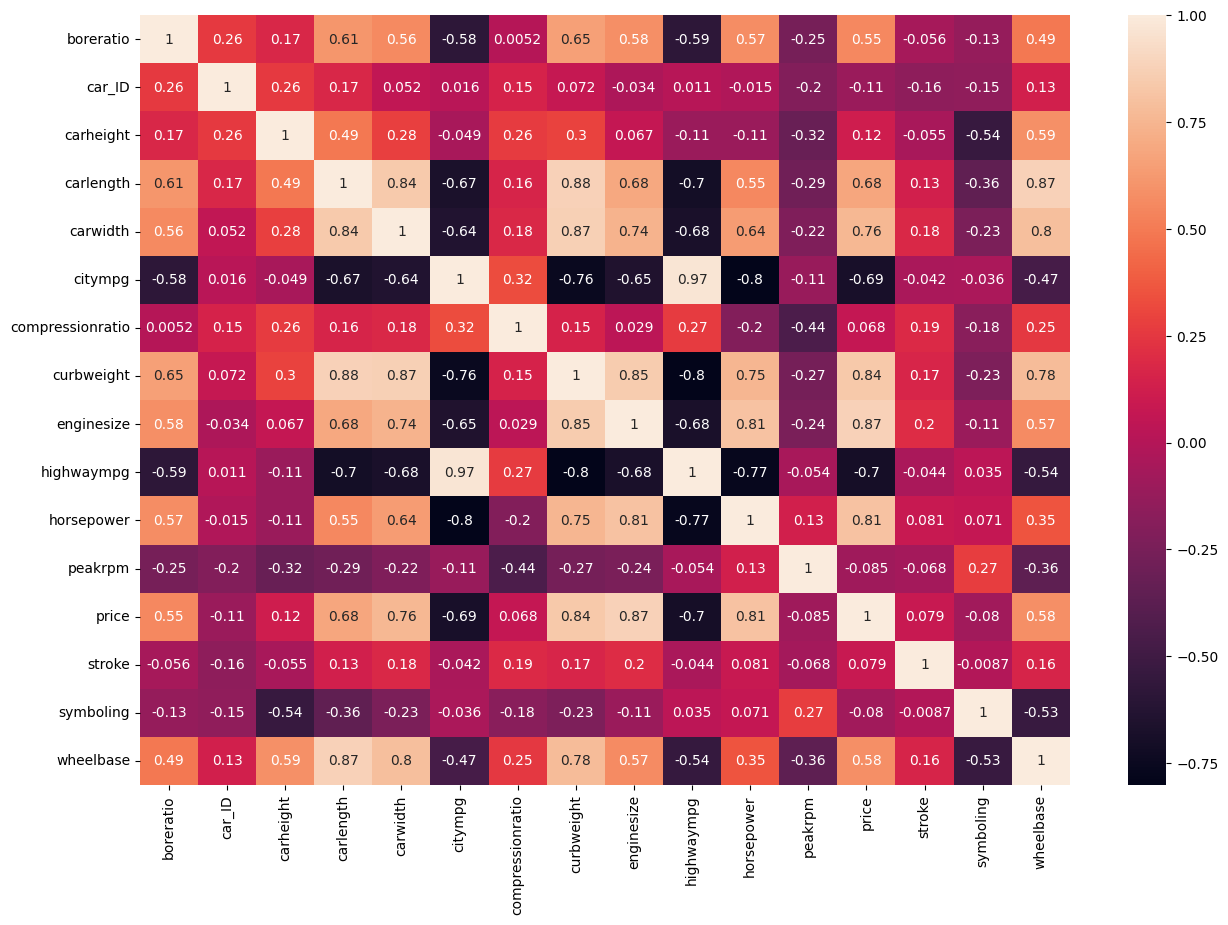

In [86]:
plt.figure(figsize=(15,10))
sns.heatmap(num_columns.corr(),annot=True)

here citympg and highway mpg are correlated can drop one column

In [87]:
num_columns.drop("citympg",inplace=True,axis=1)

In [88]:
num_columns.shape

(205, 15)

Variance threshold: if the variance in the column is constant it cannot predict the dependent variable

In [89]:
from sklearn.feature_selection import VarianceThreshold


In [90]:
#bore ratio is not important as it explains only the engine characteristics

In [91]:
num_columns.drop("boreratio",axis=1,inplace=True)

In [92]:
#symboling is categorical
num_columns.drop("symboling",axis=1,inplace=True)

In [93]:
#compression ratio is not important as it explains only the engine characteristics

In [94]:
num_columns.drop(["compressionratio","car_ID"],axis=1,inplace=True)

"Curb weight" refers to the total weight of a vehicle including all standard equipment, fuel, oil, coolant, and other necessary operating fluids but excluding any passengers or cargo. So,it helps in predicting price

Horsepower (hp) is a unit of power that measures the rate at which work is done

as higher RPM limits are often associated with more powerful and higher-performance engines, which can influence the overall value and price of the vehicle.




In [95]:
num_columns.drop(["stroke"],axis=1,inplace=True)

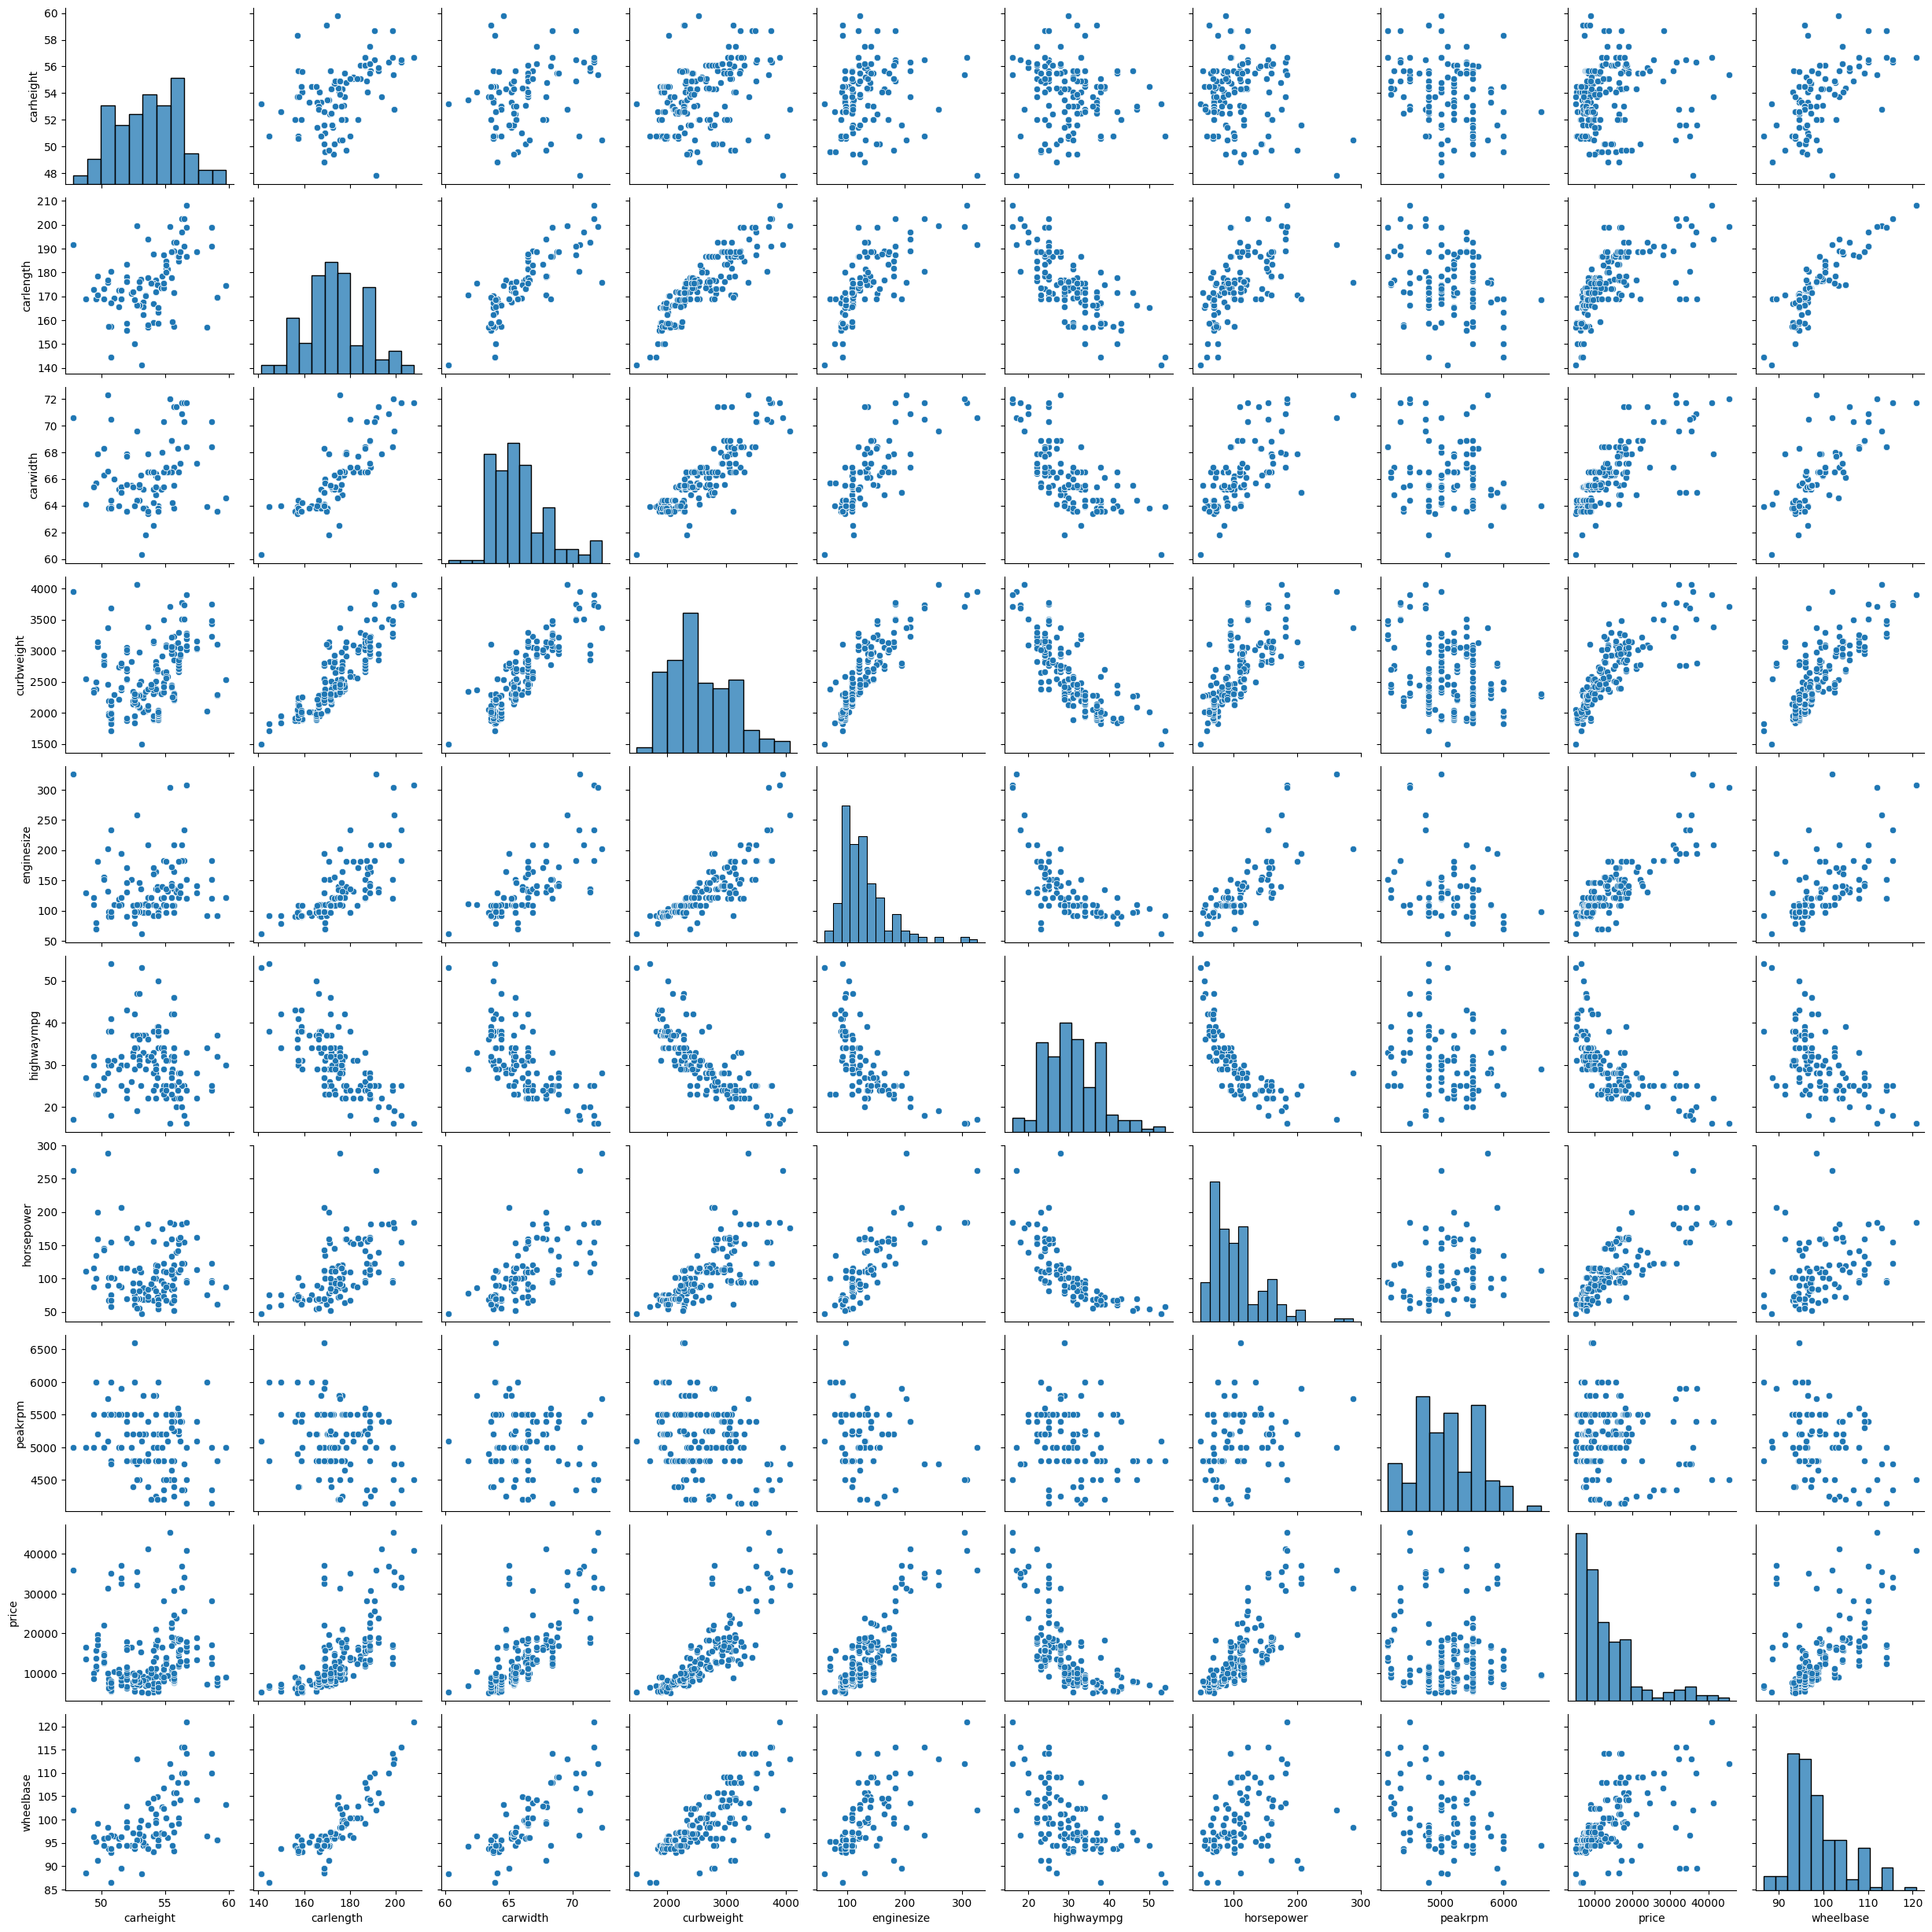

In [96]:
sns.pairplot(num_columns)

In [97]:
num_columns.columns

Index(['carheight', 'carlength', 'carwidth', 'curbweight', 'enginesize',
       'highwaympg', 'horsepower', 'peakrpm', 'price', 'wheelbase'],
      dtype='object')

In [98]:
dependent_variable=num_columns.drop("price",axis=1,inplace=True)

In [99]:
num_columns

carheight  carlength  carwidth  curbweight  enginesize  highwaympg  \
0         48.8      168.8      64.1        2548         130          27   
1         48.8      168.8      64.1        2548         130          27   
2         52.4      171.2      65.5        2823         152          26   
3         54.3      176.6      66.2        2337         109          30   
4         54.3      176.6      66.4        2824         136          22   
5         53.1      177.3      66.3        2507         136          25   
6         55.7      192.7      71.4        2844         136          25   
7         55.7      192.7      71.4        2954         136          25   
8         55.9      192.7      71.4        3086         131          20   
9         52.0      178.2      67.9        3053         131          22   
10        54.3      176.8      64.8        2395         108          29   
11        54.3      176.8      64.8        2395         108          29   
12        54.3      176.8      64.8        2710         164          28   
13        54.3      176.8      64.8        2765         164          28   
14        55.7      189.0      66.9        3055         164          25   
15        55.7      189.0      66.9        3230         209          22   
16        53.7      193.8      67.9        3380         209          22   
17        56.3      197.0      70.9        3505         209          20   
18        53.2      141.1      60.3        1488          61          53   
19        52.0      155.9      63.6        1874          90          43   
20        52.0      158.8      63.6        1909          90          43   
21        50.8      157.3      63.8        1876          90          41   
22        50.8      157.3      63.8        1876          90          38   
23        50.8      157.3      63.8        2128          98          30   
24        50.6      157.3      63.8        1967          90          38   
25        50.6      157.3      63.8        1989          90          38   
26        50.6      157.3      63.8        1989          90          38   
27        50.6      157.3      63.8        2191          98          30   
28        59.8      174.6      64.6        2535         122          30   
29        50.2      173.2      66.3        2811         156          24   
30        50.8      144.6      63.9        1713          92          54   
31        50.8      144.6      63.9        1819          92          38   
32        52.6      150.0      64.0        1837          79          42   
33        52.6      150.0      64.0        1940          92          34   
34        52.6      150.0      64.0        1956          92          34   
35        54.5      163.4      64.0        2010          92          34   
36        58.3      157.1      63.9        2024          92          34   
37        53.3      167.5      65.2        2236         110          33   
38        53.3      167.5      65.2        2289         110          33   
39        54.1      175.4      65.2        2304         110          33   
40        54.1      175.4      62.5        2372         110          33   
41        54.1      175.4      65.2        2465         110          28   
42        51.0      169.1      66.0        2293         110          31   
43        53.5      170.7      61.8        2337         111          29   
44        52.0      155.9      63.6        1874          90          43   
45        52.0      155.9      63.6        1909          90          43   
46        51.4      172.6      65.2        2734         119          29   
47        52.8      199.6      69.6        4066         258          19   
48        52.8      199.6      69.6        4066         258          19   
49        47.8      191.7      70.6        3950         326          17   
50        54.1      159.1      64.2        1890          91          31   
51        54.1      159.1      64.2        1900          91          38   
52        54.1      159.1     

In [100]:
from sklearn.model_selection import train_test_split

In [101]:
df.columns

Index(['aspiration', 'carbody', 'company_name', 'cylindernumber', 'doornumber',
       'drivewheel', 'enginelocation', 'enginetype', 'fuelsystem', 'fueltype'],
      dtype='object')

In [102]:
from sklearn.preprocessing import MinMaxScaler

In [103]:
mm=MinMaxScaler()

In [104]:
cat_columns.columns

Index(['aspiration', 'doornumber', 'enginelocation', 'fueltype',
       'carbody_convertible', 'carbody_hardtop', 'carbody_hatchback',
       'carbody_sedan', 'carbody_wagon', 'cylindernumber_eight',
       'cylindernumber_five', 'cylindernumber_four', 'cylindernumber_six',
       'cylindernumber_three', 'cylindernumber_twelve', 'cylindernumber_two',
       'drivewheel_4wd', 'drivewheel_fwd', 'drivewheel_rwd', 'enginetype_dohc',
       'enginetype_dohcv', 'enginetype_l', 'enginetype_ohc', 'enginetype_ohcf',
       'enginetype_ohcv', 'enginetype_rotor', 'fuelsystem_1bbl',
       'fuelsystem_2bbl', 'fuelsystem_4bbl', 'fuelsystem_idi',
       'fuelsystem_mfi', 'fuelsystem_mpfi', 'fuelsystem_spdi',
       'fuelsystem_spfi', 'Budget', 'Medium', 'Highend'],
      dtype='object')

In [105]:
#doornumber will not help[ in prediction
cat_columns.drop("doornumber",inplace=True,axis=1)

In [106]:
cat_columns=pd.concat([data["price"],cat_columns],axis=1)

Width: The width of the violin represents the density of data points at different values. A wider section indicates a higher concentration of data points, while a narrower section suggests a lower concentration.

Symmetry: The violin plot may exhibit symmetry or asymmetry. If the left and right halves of the plot are approximately mirror images of each other, it suggests a symmetric distribution. On the other hand, an asymmetric shape may indicate skewness in the data.

Peaks and Dips: The presence of peaks and dips in the violin plot can reveal important information about the underlying data distribution. A peak indicates a region of high density, while a dip represents a lower density region.

Whiskers: The whiskers of the violin plot show the range of the data. If the whiskers extend far from the center, it suggests a larger spread or a presence of outliers. Conversely, shorter whiskers indicate a narrower range of values.

<Axes: xlabel='enginelocation', ylabel='price'>

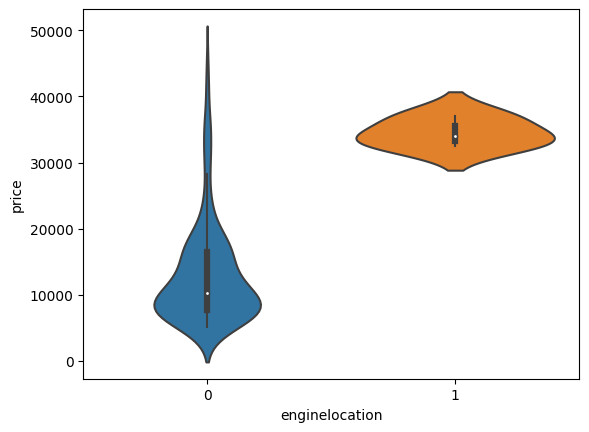

In [107]:
sns.violinplot(x="enginelocation",y="price",data=cat_columns)

CONCLUSION=rear type enginelocation in carsdoes not come in low prices
Whisker does not have wider spread means only few people buy that
high peak and dip are near in rear 

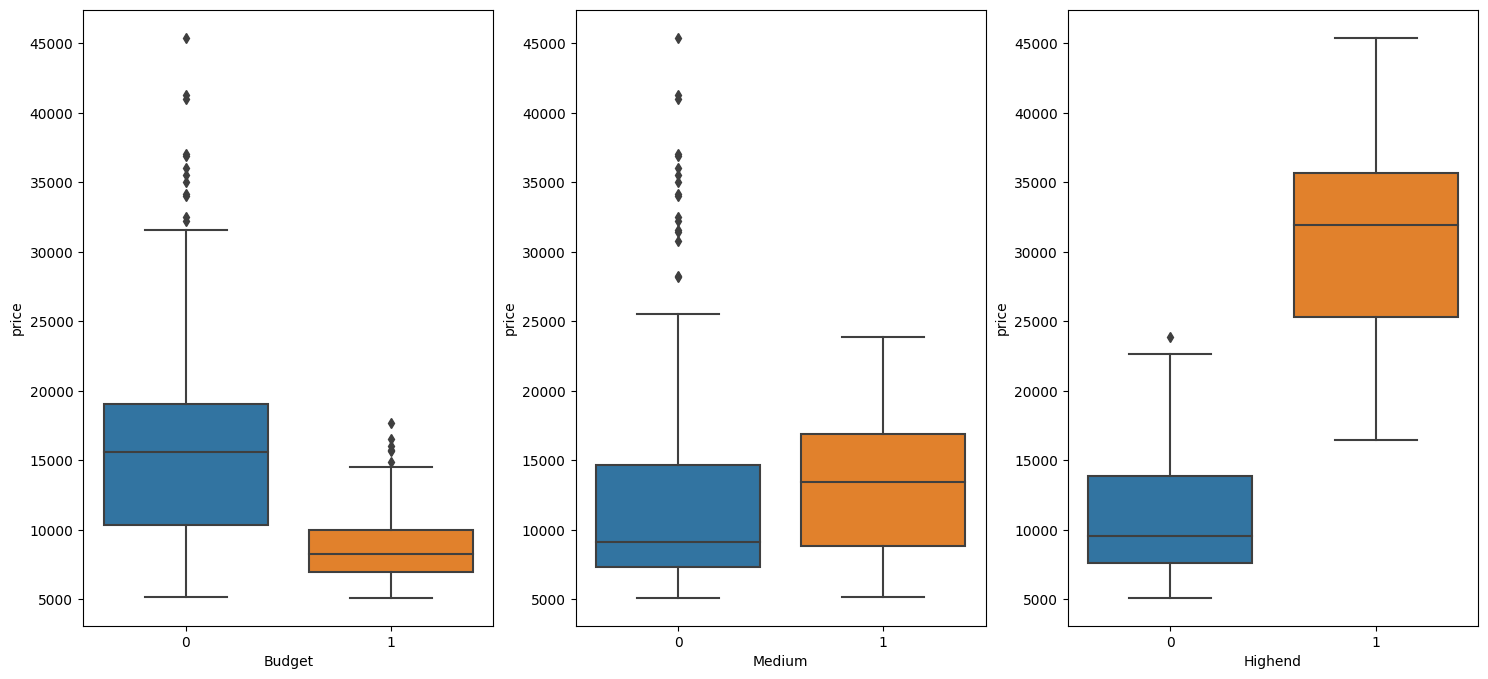

In [108]:
def colns(a,b,c):
  fig=plt.figure(figsize=(18,8))
  x=1
  for i in [a,b,c]:
    plt.subplot(1,3,x)
    sns.boxplot(x=i,y="price",data=cat_columns)
    x+=1
colns("Budget","Medium","Highend")

In [109]:
cat_columns.drop("aspiration",inplace=True,axis=1)

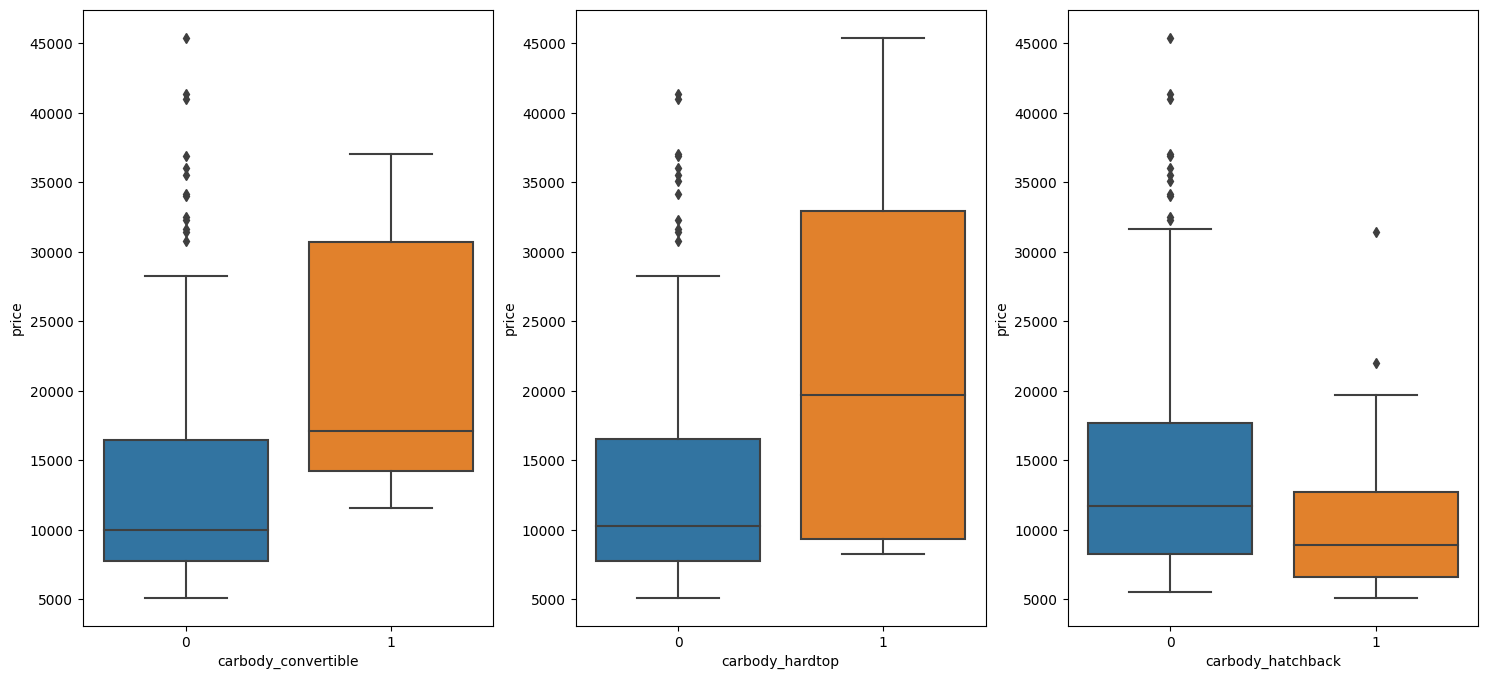

In [110]:
colns( 'carbody_convertible', 'carbody_hardtop', 'carbody_hatchback')

Conclusion:carbody type hatchback does not seems to be costly,its around the budget price

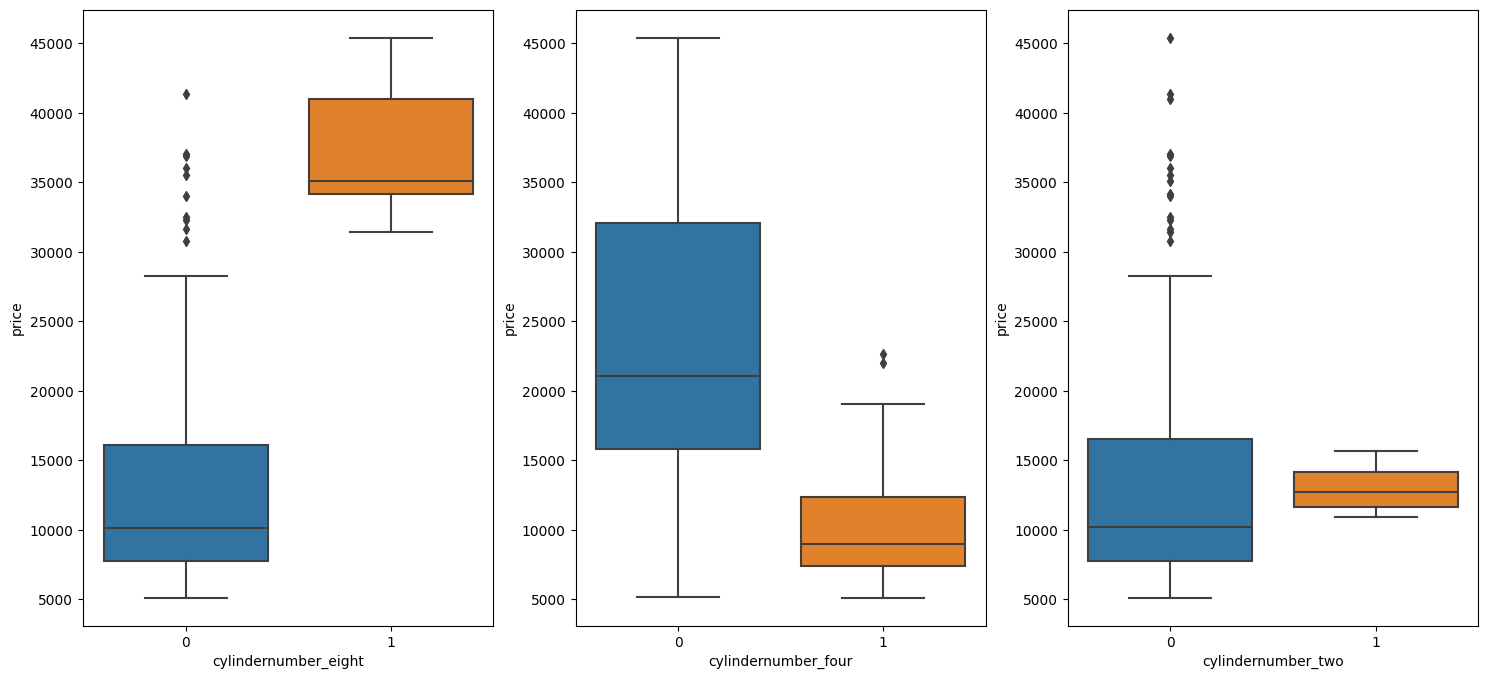

In [111]:
 colns('cylindernumber_eight', 'cylindernumber_four', 'cylindernumber_two')

CONCLUSION: eight cylinders are found in highend cars

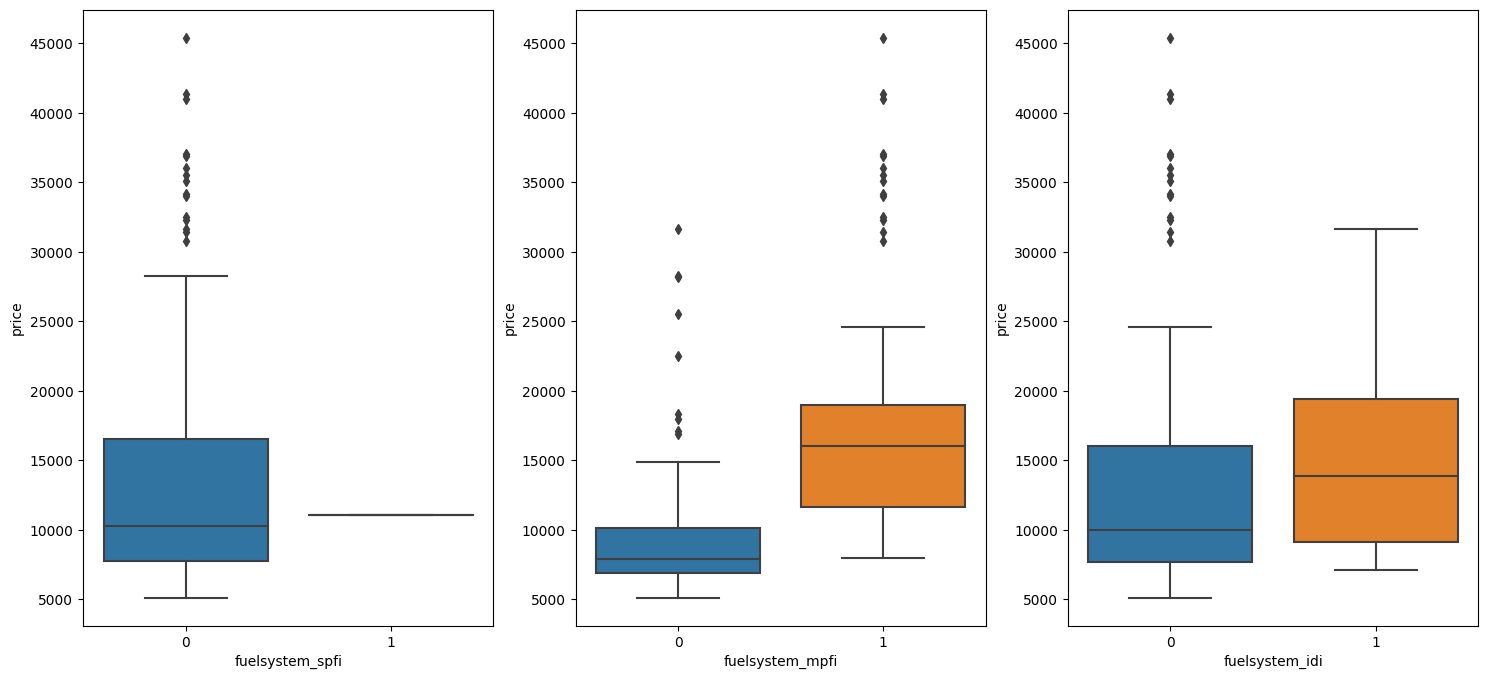

In [112]:
colns('fuelsystem_spfi', 'fuelsystem_mpfi', 'fuelsystem_idi')

Splitting train and test data split

In [116]:
cat_columns.drop("price",axis=1,inplace=True)

In [118]:
final_set=pd.DataFrame()

In [119]:
for i in [cat_columns,num_columns]:
  final_set=pd.concat([final_set,i],axis=1)

In [120]:
final_set

enginelocation  fueltype  carbody_convertible  carbody_hardtop  \
0                 0         1                    1                0   
1                 0         1                    1                0   
2                 0         1                    0                0   
3                 0         1                    0                0   
4                 0         1                    0                0   
5                 0         1                    0                0   
6                 0         1                    0                0   
7                 0         1                    0                0   
8                 0         1                    0                0   
9                 0         1                    0                0   
10                0         1                    0                0   
11                0         1                    0                0   
12                0         1                    0                0   
13                0         1                    0                0   
14                0         1                    0                0   
15                0         1                    0                0   
16                0         1                    0                0   
17                0         1                    0                0   
18                0         1                    0                0   
19                0         1                    0                0   
20                0         1                    0                0   
21                0         1                    0                0   
22                0         1                    0                0   
23                0         1                    0                0   
24                0         1                    0                0   
25                0         1                    0                0   
26                0         1                    0                0   
27                0         1                    0                0   
28                0         1                    0                0   
29                0         1                    0                0   
30                0         1                    0                0   
31                0         1                    0                0   
32                0         1                    0                0   
33                0         1                    0                0   
34                0         1                    0                0   
35                0         1                    0                0   
36                0         1                    0                0   
37                0         1                    0                0   
38                0         1                    0                0   
39                0         1                    0                0   
40                0         1                    0                0   
41                0         1                    0                0   
42                0         1                    0                0   
43                0         1                    0                0   
44                0         1                    0                0   
45                0         1                    0                0   
46                0         1                    0                0   
47                0         1                    0                0   
48                0         1                    0                0   
49                0         1                    0                0   
50                0         1                    0                0   
51                0         1                    0                0   
52                0         1                    0                0   
53                0         1                    0                0   
54                0         1                    0                0   
55                0         1

In [126]:
from sklearn.model_selection import train_test_split

In [127]:
y=data["price"]

In [128]:
xtrain,xtest,ytrain,ytest=train_test_split(final_set,y,test_size=0.25,random_state=42)

In [130]:
xtrain.shape

(153, 44)

In [131]:
xtrain

enginelocation  fueltype  carbody_convertible  carbody_hardtop  \
90                0         0                    0                0   
173               0         1                    0                0   
93                0         1                    0                0   
5                 0         1                    0                0   
167               0         1                    0                1   
56                0         1                    0                0   
128               1         1                    1                0   
76                0         1                    0                0   
144               0         1                    0                0   
104               0         1                    0                0   
177               0         1                    0                0   
75                0         1                    0                0   
174               0         0                    0                0   
31                0         1                    0                0   
12                0         1                    0                0   
35                0         1                    0                0   
125               0         1                    0                0   
42                0         1                    0                0   
156               0         1                    0                0   
136               0         1                    0                0   
140               0         1                    0                0   
51                0         1                    0                0   
113               0         1                    0                0   
166               0         1                    0                0   
41                0         1                    0                0   
124               0         1                    0                0   
78                0         1                    0                0   
119               0         1                    0                0   
26                0         1                    0                0   
137               0         1                    0                0   
200               0         1                    0                0   
117               0         1                    0                0   
2                 0         1                    0                0   
77                0         1                    0                0   
46                0         1                    0                0   
122               0         1                    0                0   
127               1         1                    0                1   
85                0         1                    0                0   
138               0         1                    0                0   
36                0         1                    0                0   
114               0         0                    0                0   
61                0         1                    0                0   
22                0         1                    0                0   
135               0         1                    0                0   
192               0         0                    0                0   
33                0         1                    0                0   
11                0         1                    0                0   
199               0         1                    0                0   
163               0         1                    0                0   
6                 0         1                    0                0   
27                0         1                    0                0   
126               1         1                    0                1   
196               0         1                    0                0   
141               0         1                    0                0   
4                 0         1                    0                0   
32                0         1

In [132]:
num_coln=pd.DataFrame()

In [140]:
num_coln=xtrain.iloc[:,-9:]

In [143]:
num_coln.shape

(153, 9)

In [150]:
xtrain.columns

Index(['enginelocation', 'fueltype', 'carbody_convertible', 'carbody_hardtop',
       'carbody_hatchback', 'carbody_sedan', 'carbody_wagon',
       'cylindernumber_eight', 'cylindernumber_five', 'cylindernumber_four',
       'cylindernumber_six', 'cylindernumber_three', 'cylindernumber_twelve',
       'cylindernumber_two', 'drivewheel_4wd', 'drivewheel_fwd',
       'drivewheel_rwd', 'enginetype_dohc', 'enginetype_dohcv', 'enginetype_l',
       'enginetype_ohc', 'enginetype_ohcf', 'enginetype_ohcv',
       'enginetype_rotor', 'fuelsystem_1bbl', 'fuelsystem_2bbl',
       'fuelsystem_4bbl', 'fuelsystem_idi', 'fuelsystem_mfi',
       'fuelsystem_mpfi', 'fuelsystem_spdi', 'fuelsystem_spfi', 'Budget',
       'Medium', 'Highend', 'carheight', 'carlength', 'carwidth', 'curbweight',
       'enginesize', 'highwaympg', 'horsepower', 'peakrpm', 'wheelbase'],
      dtype='object')

In [152]:
xtrain.drop("horsepower",inplace=True,axis=1)

In [153]:
for i in ['carheight', 'carlength', 'carwidth', 'curbweight', 'enginesize',
       'highwaympg', 'peakrpm', 'wheelbase']:
       xtrain.drop(i,inplace=True,axis=1)

In [154]:
xtrain

enginelocation  fueltype  carbody_convertible  carbody_hardtop  \
90                0         0                    0                0   
173               0         1                    0                0   
93                0         1                    0                0   
5                 0         1                    0                0   
167               0         1                    0                1   
56                0         1                    0                0   
128               1         1                    1                0   
76                0         1                    0                0   
144               0         1                    0                0   
104               0         1                    0                0   
177               0         1                    0                0   
75                0         1                    0                0   
174               0         0                    0                0   
31                0         1                    0                0   
12                0         1                    0                0   
35                0         1                    0                0   
125               0         1                    0                0   
42                0         1                    0                0   
156               0         1                    0                0   
136               0         1                    0                0   
140               0         1                    0                0   
51                0         1                    0                0   
113               0         1                    0                0   
166               0         1                    0                0   
41                0         1                    0                0   
124               0         1                    0                0   
78                0         1                    0                0   
119               0         1                    0                0   
26                0         1                    0                0   
137               0         1                    0                0   
200               0         1                    0                0   
117               0         1                    0                0   
2                 0         1                    0                0   
77                0         1                    0                0   
46                0         1                    0                0   
122               0         1                    0                0   
127               1         1                    0                1   
85                0         1                    0                0   
138               0         1                    0                0   
36                0         1                    0                0   
114               0         0                    0                0   
61                0         1                    0                0   
22                0         1                    0                0   
135               0         1                    0                0   
192               0         0                    0                0   
33                0         1                    0                0   
11                0         1                    0                0   
199               0         1                    0                0   
163               0         1                    0                0   
6                 0         1                    0                0   
27                0         1                    0                0   
126               1         1                    0                1   
196               0         1                    0                0   
141               0         1                    0                0   
4                 0         1                    0                0   
32                0         1

Normalization:
to normalize the values of different scale so that the prediction cannot be biased on particular coln

In [155]:
from sklearn.preprocessing import Normalizer

In [156]:
#creating object
n=Normalizer()

In [160]:
num_coln[['carheight', 'carlength', 'carwidth', 'curbweight', 'enginesize',
       'highwaympg', 'horsepower', 'peakrpm', 'wheelbase']]=n.fit_transform(num_coln[['carheight', 'carlength', 'carwidth', 'curbweight', 'enginesize',
       'highwaympg', 'horsepower', 'peakrpm', 'wheelbase']])

In [161]:
num_coln

carheight  carlength  carwidth  curbweight  enginesize  highwaympg  \
90    0.010456   0.031714  0.012240    0.386972    0.019761    0.009593   
173   0.011417   0.036517  0.013829    0.483707    0.025371    0.007071   
93    0.009579   0.030472  0.011423    0.362372    0.017367    0.006624   
5     0.008775   0.029301  0.010957    0.414310    0.022476    0.004132   
167   0.009562   0.032400  0.012063    0.467058    0.026847    0.005516   
56    0.007679   0.026163  0.010171    0.368453    0.010837    0.003561   
128   0.007890   0.025825  0.009938    0.428120    0.029663    0.003822   
76    0.008714   0.026983  0.011047    0.329013    0.015782    0.007033   
144   0.010119   0.032054  0.012188    0.444469    0.020127    0.004659   
104   0.008218   0.028226  0.011227    0.507797    0.029929    0.004134   
177   0.011059   0.036029  0.013644    0.504320    0.025031    0.006566   
75    0.009458   0.030791  0.011737    0.502255    0.024163    0.004142   
174   0.010671   0.034132  0.012926    0.482052    0.021381    0.006414   
31    0.008097   0.023049  0.010185    0.289940    0.014664    0.006057   
12    0.010754   0.035013  0.012833    0.536686    0.032478    0.005545   
35    0.008607   0.025804  0.010107    0.317418    0.014529    0.005369   
125   0.008138   0.027379  0.011072    0.450320    0.024477    0.004377   
42    0.008551   0.028351  0.011065    0.384439    0.018442    0.005197   
156   0.010120   0.031752  0.012296    0.397336    0.018712    0.007065   
136   0.009073   0.030180  0.010756    0.454157    0.019570    0.004205   
140   0.011268   0.031821  0.012906    0.453139    0.021848    0.006271   
51    0.010105   0.029716  0.011991    0.354874    0.016997    0.007097   
113   0.009466   0.033207  0.011420    0.548447    0.020035    0.004007   
166   0.007521   0.024120  0.009151    0.328849    0.014012    0.004146   
41    0.008577   0.027807  0.010337    0.390795    0.017439    0.004439   
124   0.008734   0.030135  0.011536    0.490304    0.027142    0.004176   
78    0.008671   0.026850  0.010993    0.342073    0.015704    0.006486   
119   0.008607   0.026650  0.010809    0.360525    0.016603    0.005083   
26    0.008645   0.026874  0.010900    0.339812    0.015376    0.006492   
137   0.009047   0.030093  0.010725    0.459143    0.019514    0.004193   
200   0.009008   0.030642  0.011182    0.479109    0.022884    0.004544   
117   0.008719   0.029069  0.010634    0.487341    0.020864    0.003737   
2     0.009113   0.029774  0.011391    0.490959    0.026435    0.004522   
77    0.008701   0.026943  0.011031    0.332983    0.015758    0.006509   
46    0.009010   0.030256  0.011429    0.479253    0.020860    0.005084   
122   0.008573   0.028235  0.010767    0.369768    0.016539    0.006413   
127   0.007912   0.025899  0.009967    0.422602    0.029748    0.003833   
85    0.009318   0.031134  0.011811    0.427096    0.022032    0.005779   
138   0.010100   0.029510  0.011924    0.385571    0.018244    0.006771   
36    0.009200   0.024792  0.010084    0.319410    0.014519    0.005366   
114   0.010815   0.036645  0.012602    0.642063    0.028004    0.004606   
61    0.010006   0.033131  0.012392    0.444420    0.022733    0.005963   
22    0.008735   0.027047  0.010970    0.322569    0.015475    0.006534   
135   0.009449   0.031430  0.011201    0.464539    0.020380    0.004716   
192   0.010611   0.034701  0.012883    0.496634    0.018679    0.007318   
33    0.008336   0.023771  0.010142    0.307444    0.014580    0.005388   
11    0.008646   0.028150  0.010317    0.381326    0.017195    0.004617   
199   0.009573   0.031434  0.011188    0.525622    0.021644    0.003663   
163   0.009975   0.031993  0.012137    0.411341    0.018585    0.006448   
6     0.008985   0.031086  0.011518    0.458793    0.021939    0.004033   
27    0.008539   0.026546  0.010767    0.369758    0.016539    0.005063   
126   0.007912   0.025899  0.009967    0.422602    0.029748    0.003833   
196   0.009133   0.030683  0.0

In [162]:
xtrain=pd.concat([xtrain,num_coln],axis=1)

In [164]:
xtrain.shape

(153, 44)

In [166]:
num_coln2=xtest.iloc[:,-9:]

In [167]:
num_coln2

carheight  carlength  carwidth  curbweight  enginesize  highwaympg  \
15        55.7      189.0      66.9        3230         209          22   
9         52.0      178.2      67.9        3053         131          22   
100       54.7      173.4      65.2        2302         120          34   
132       56.1      186.6      66.5        2658         121          28   
68        58.7      190.9      70.3        3750         183          25   
95        53.3      165.6      63.8        2028          97          37   
159       52.8      166.3      64.4        2275         110          47   
162       52.8      166.3      64.4        2140          98          34   
147       53.0      173.5      65.4        2455         108          31   
182       55.7      171.7      65.5        2261          97          46   
191       55.1      180.2      66.9        2661         136          24   
164       52.6      168.7      64.0        2204          98          34   
65        54.4      175.0      66.1        2670         140          27   
175       53.9      175.6      66.5        2414         122          32   
73        56.7      208.1      71.7        3900         308          16   
152       54.5      158.7      63.6        2015          92          38   
18        53.2      141.1      60.3        1488          61          53   
82        50.2      173.2      66.3        2833         156          24   
86        51.6      172.4      65.4        2405         122          32   
143       52.5      172.0      65.4        2340         108          32   
60        55.5      177.8      66.5        2410         122          32   
101       55.1      181.7      66.5        3095         181          22   
98        53.3      162.4      63.8        2008          97          37   
30        50.8      144.6      63.9        1713          92          54   
25        50.6      157.3      63.8        1989          90          38   
16        53.7      193.8      67.9        3380         209          22   
168       52.0      176.2      65.6        2536         146          30   
195       57.5      188.8      67.2        3034         141          28   
97        53.5      170.2      63.8        2037          97          37   
194       56.2      188.8      67.2        2912         141          28   
67        56.5      190.9      70.3        3515         183          25   
120       50.6      157.3      63.8        1967          90          38   
154       59.1      169.7      63.6        2290          92          32   
202       55.5      188.8      68.9        3012         173          23   
79        50.8      157.3      63.8        2145          98          30   
69        54.9      187.5      70.3        3495         183          25   
145       54.3      172.0      65.4        2510         108          29   
55        49.6      169.0      65.7        2380          70          23   
45        52.0      155.9      63.6        1909          90          43   
84        50.2      173.2      66.3        2926         156          24   
146       53.0      173.5      65.4        2290         108          32   
66        54.4      175.0      66.1        2700         134          39   
111       56.7      186.7      68.4        3075         120          24   
153       59.1      169.7      63.6        2280          92          37   
96        54.5      165.3      63.8        1971          97          37   
38        53.3      167.5      65.2        2289         110          33   
24        50.6      157.3      63.8        1967          90          38   
139       53.7      157.9      63.6        2120         108          31   
112       56.7      186.7      68.4        3252         152          33   
29        50.2      173.2      66.3        2811         156          24   
19        52.0      155.9      63.6        1874          90          43   
178       52.0      183.5      67.7        2976         171          24   

     horsepower  peakrpm  whe

In [168]:
num_coln2.columns

Index(['carheight', 'carlength', 'carwidth', 'curbweight', 'enginesize',
       'highwaympg', 'horsepower', 'peakrpm', 'wheelbase'],
      dtype='object')

In [169]:
for i in ['carheight', 'carlength', 'carwidth', 'curbweight', 'enginesize',
       'highwaympg', 'horsepower', 'peakrpm', 'wheelbase']:
       xtest.drop(i,axis=1,inplace=True)

In [170]:
num_coln2[['carheight', 'carlength', 'carwidth', 'curbweight', 'enginesize',
       'highwaympg', 'horsepower', 'peakrpm', 'wheelbase']]=n.transform(num_coln2[['carheight', 'carlength', 'carwidth', 'curbweight', 'enginesize',
       'highwaympg', 'horsepower', 'peakrpm', 'wheelbase']])

In [172]:
xtest=pd.concat([xtest,num_coln2],axis=1)

In [173]:
xtest.shape

(52, 44)